In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

RANDOM_STATE = 42

In [2]:
X_train = pd.read_csv("X_train.csv")
X_train.head()

,id,additions,additions_avg,additions_max,avg_play_size,avg_task_size,change_set_avg,change_set_max,code_churn_avg,code_churn_count,...,delta_num_prompts,delta_num_regex,delta_num_roles,delta_num_suspicious_comments,delta_num_tasks,delta_num_tokens,delta_num_unique_names,delta_num_uri,delta_num_vars,delta_text_entropy
0,0,0,0,0,0.0,10.0,2,27,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,0,0.0,6.0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0,0,0,0.0,4.0,2,12,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0,0,0,0.0,6.0,1,4,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0,0,0,0.0,4.0,1,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159090 entries, 0 to 159089
Columns: 109 entries, id to delta_text_entropy
dtypes: float64(94), int64(15)
memory usage: 132.3 MB


In [4]:
y_train = pd.read_csv("y_train.csv")
y_train.head()

,id,failure_prone
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [5]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159090 entries, 0 to 159089
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   id             159090 non-null  int64
 1   failure_prone  159090 non-null  int64
dtypes: int64(2)
memory usage: 2.4 MB


In [6]:
#y_train = y_train.drop(columns=["id"])

In [7]:
X_train.isnull().sum().sort_values(ascending=False)

id                                0
delta_num_block_error_handling    0
delta_num_file_mode               0
delta_num_file_exists             0
delta_num_fact_modules            0
                                 ..
num_file_exists                   0
num_fact_modules                  0
num_external_modules              0
num_distinct_modules              0
delta_text_entropy                0
Length: 109, dtype: int64

In [8]:
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")

X_train shape: (159090, 109), y_train shape: (159090, 2)


In [9]:
X_train.describe()

,id,additions,additions_avg,additions_max,avg_play_size,avg_task_size,change_set_avg,change_set_max,code_churn_avg,code_churn_count,...,delta_num_prompts,delta_num_regex,delta_num_roles,delta_num_suspicious_comments,delta_num_tasks,delta_num_tokens,delta_num_unique_names,delta_num_uri,delta_num_vars,delta_text_entropy
count,159090.0000,159090.000000,159090.000000,159090.000000,159090.000000,159090.000000,159090.000000,159090.000000,159090.000000,159090.000000,...,159090.000000,159090.000000,159090.000000,159090.000000,159090.000000,159090.000000,159090.000000,159090.000000,159090.000000,159090.000000
mean,79544.5000,2.499761,1.297800,1.885650,1.347525,15.022539,2.331096,17.088799,0.848752,1.439368,...,0.000178,0.000360,-0.000486,-0.000083,0.011678,0.637720,0.022702,0.000056,0.005497,0.004043
std,45925.4715,25.308382,20.049906,21.881413,9.787596,34.807695,6.862599,58.259392,20.339733,23.157311,...,0.219844,0.118208,0.131595,0.049449,1.164814,23.787488,0.944614,0.038023,0.510883,0.158226
min,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-389.000000,-1105.000000,...,-11.000000,-20.000000,-20.000000,-11.000000,-105.000000,-2685.000000,-132.000000,-7.000000,-66.000000,-7.500000
25%,39772.2500,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,79544.5000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,4.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,119316.7500,0.000000,0.000000,0.000000,0.000000,10.000000,2.000000,12.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,159089.0000,6967.000000,6967.000000,6967.000000,1035.000000,3452.000000,198.000000,990.000000,6967.000000,6967.000000,...,13.000000,20.000000,15.000000,5.000000,120.000000,1497.000000,69.000000,4.000000,56.000000,5.480000


In [10]:
X_train.select_dtypes(include=['object']).columns

Index([], dtype='object')

In [11]:
X_train = X_train.drop(columns=["id"])

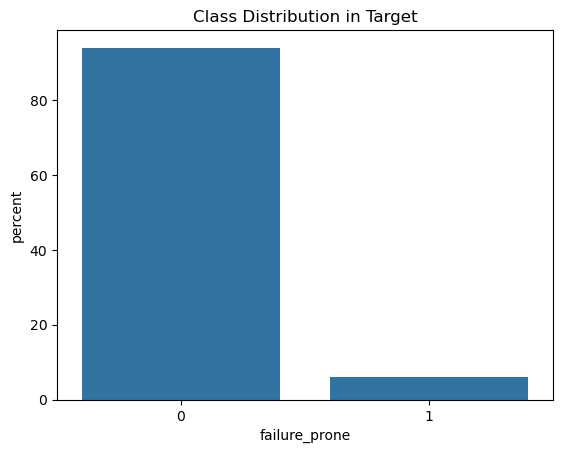

In [12]:
sns.countplot(x=y_train.iloc[:, 1], stat='percent')
plt.title("Class Distribution in Target")
plt.show()

In [13]:
y_train.iloc[:, 1].value_counts()

failure_prone
0    149452
1      9638
Name: count, dtype: int64

In [14]:
y_train.iloc[:, 1].value_counts(normalize=True)

failure_prone
0    0.939418
1    0.060582
Name: proportion, dtype: float64

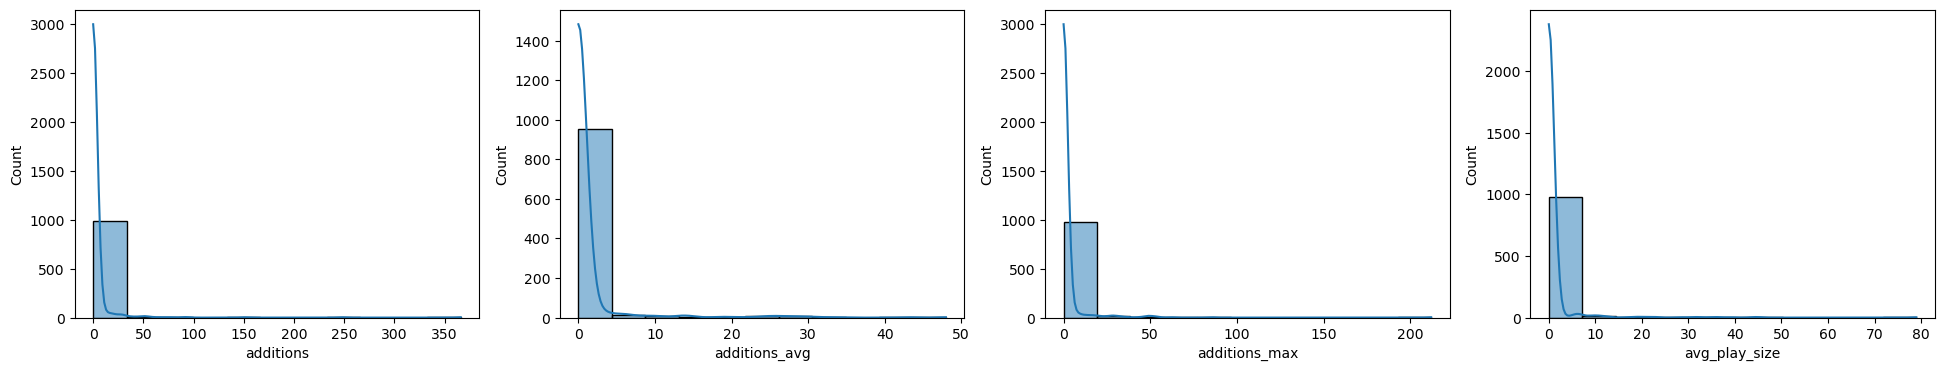

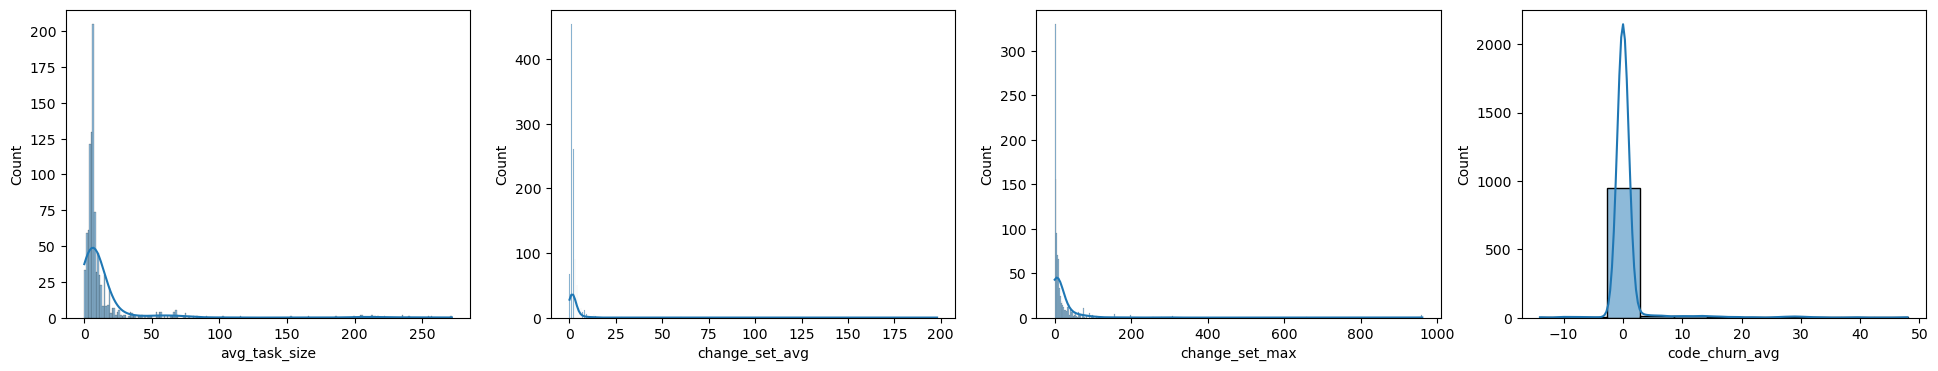

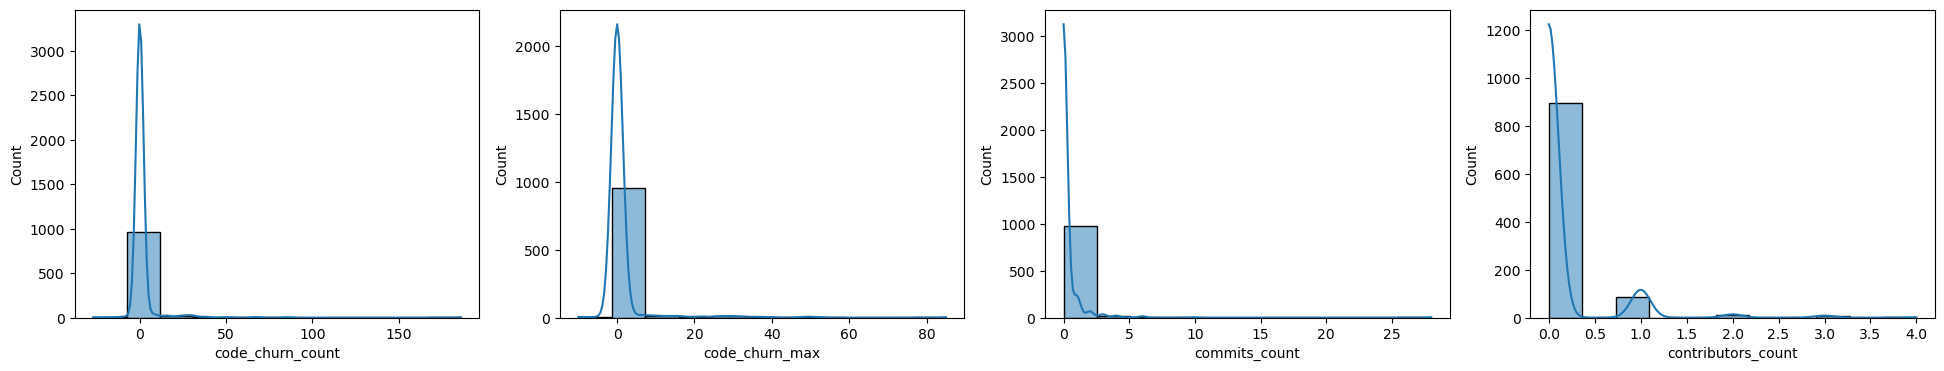

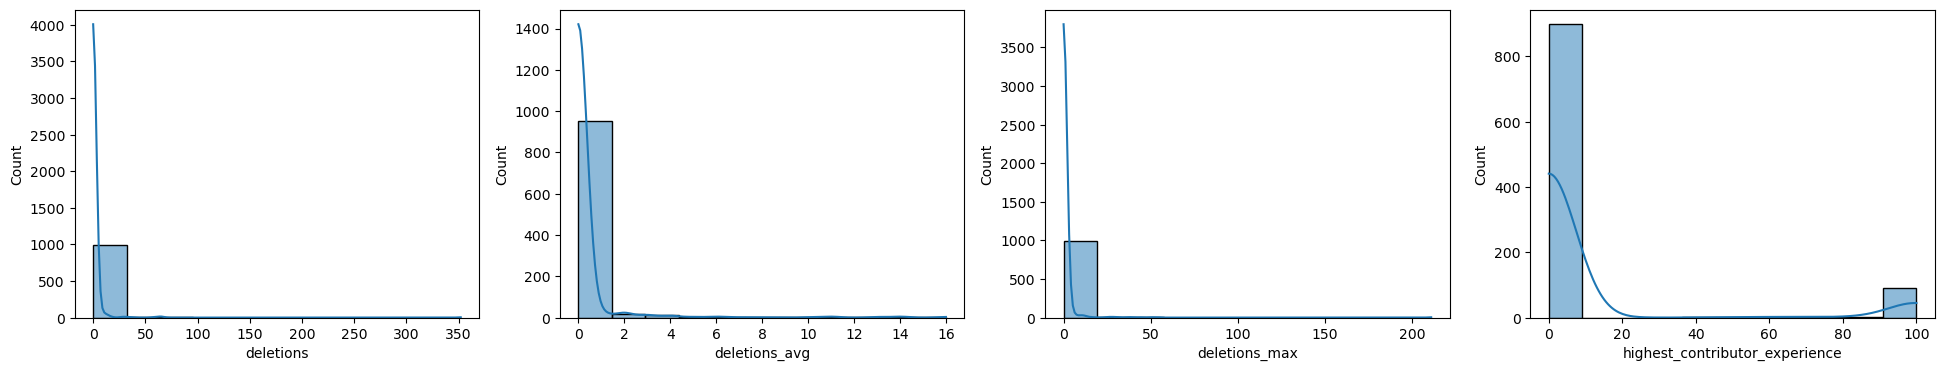

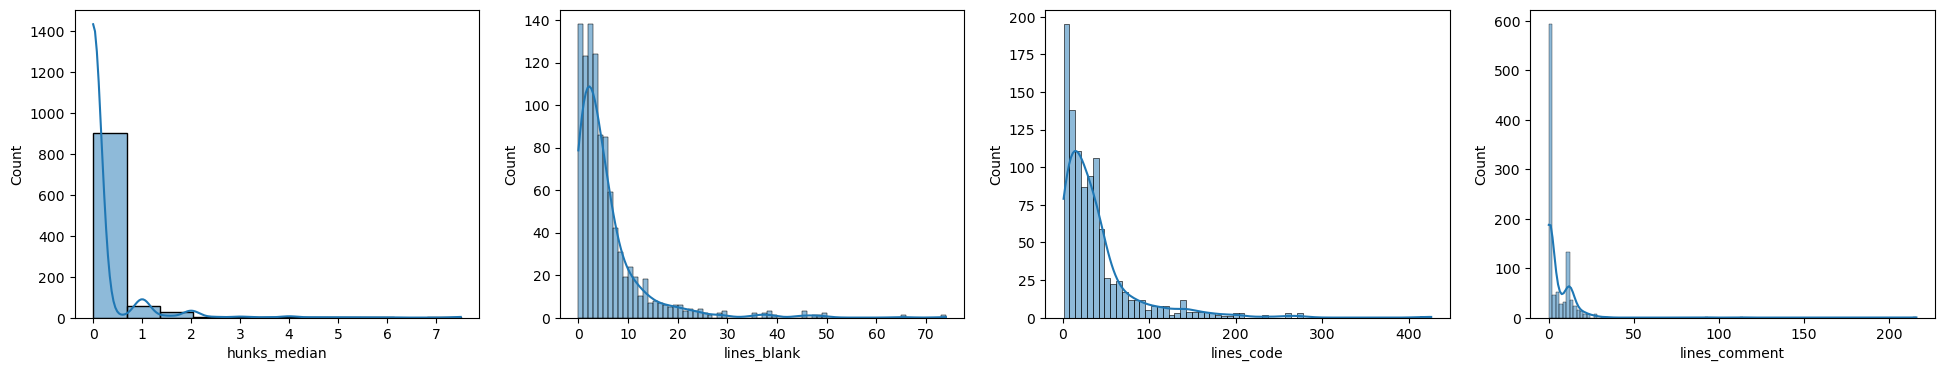

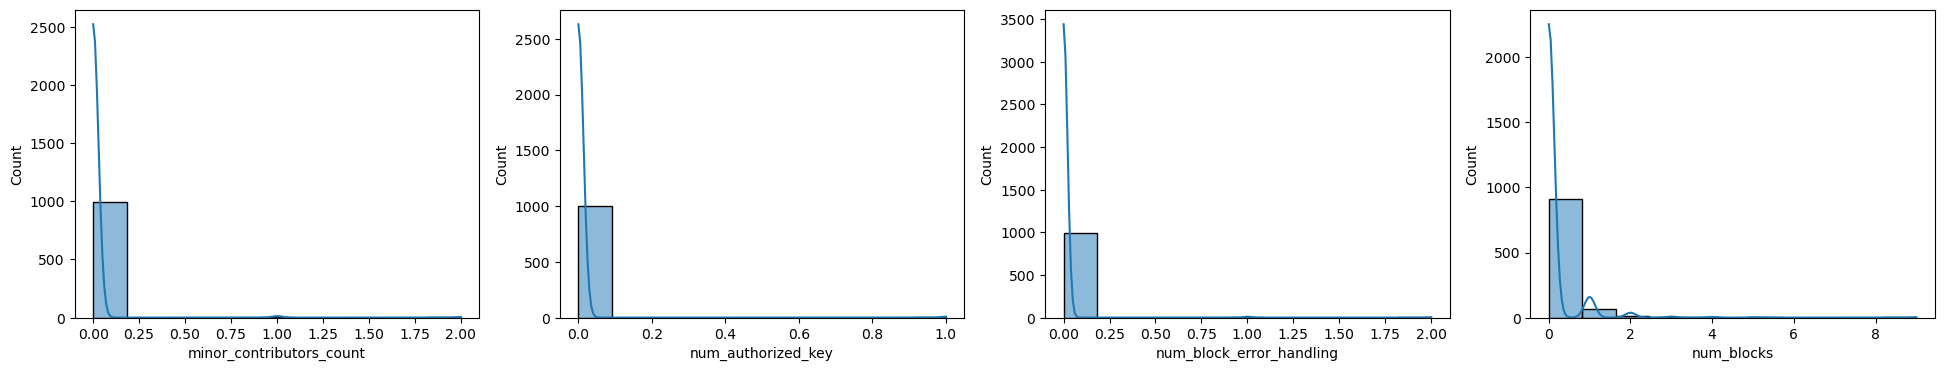

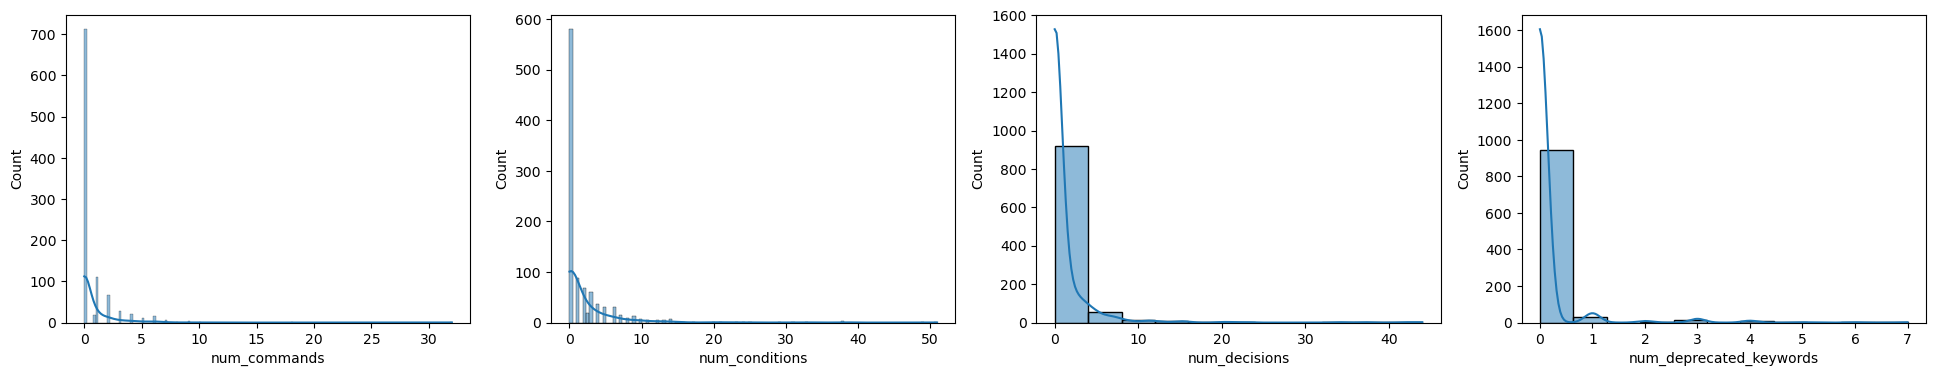

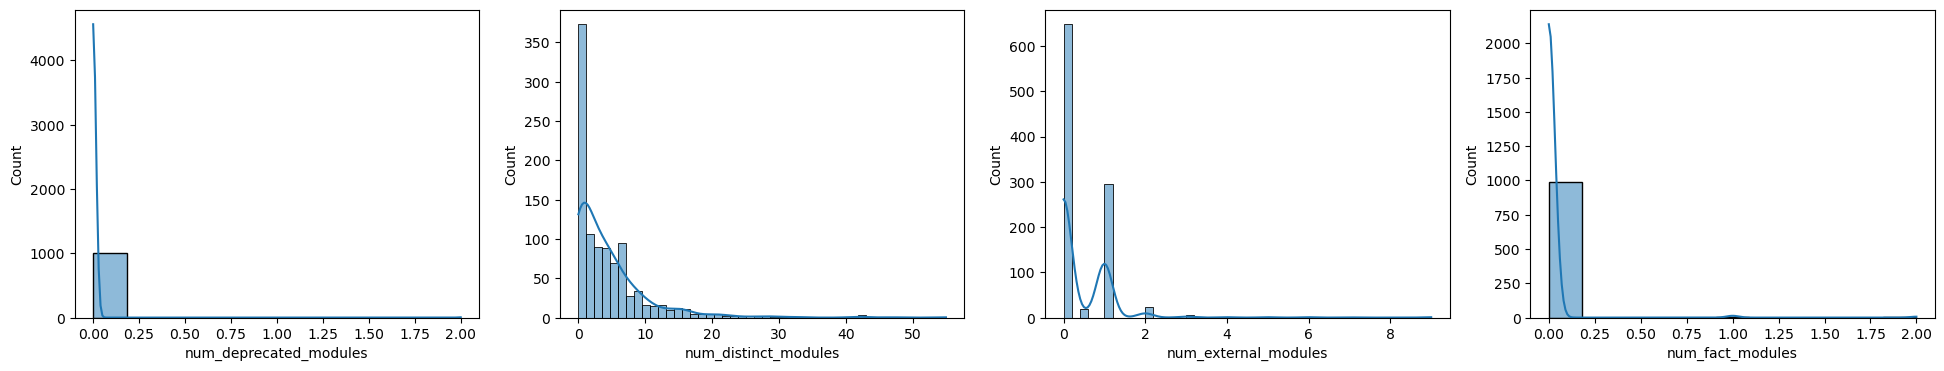

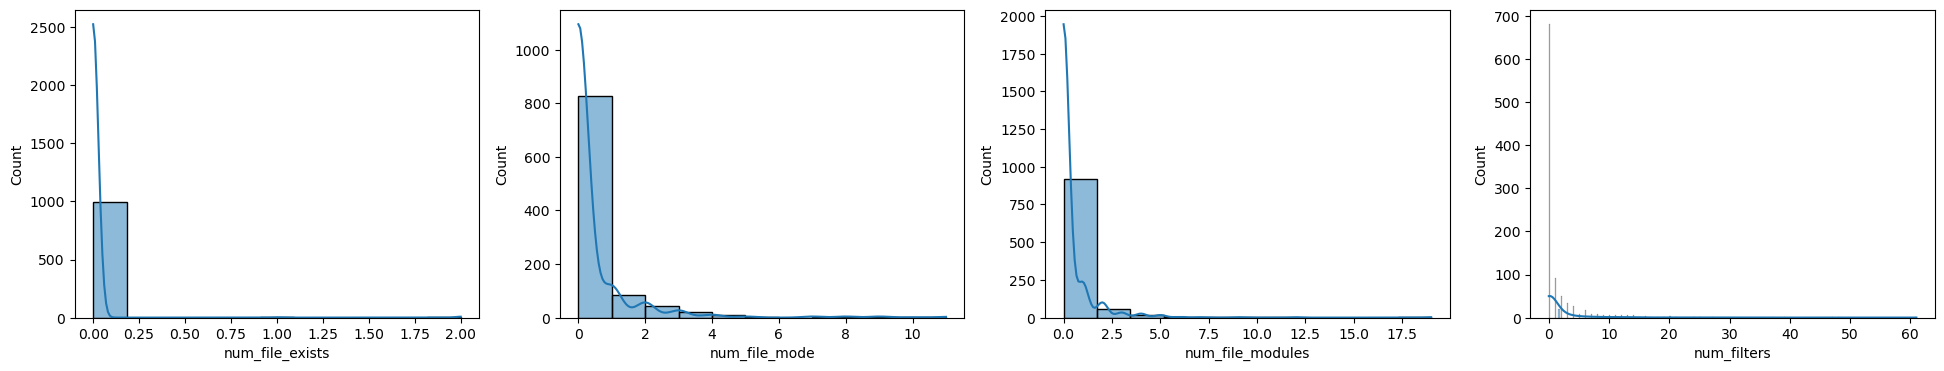

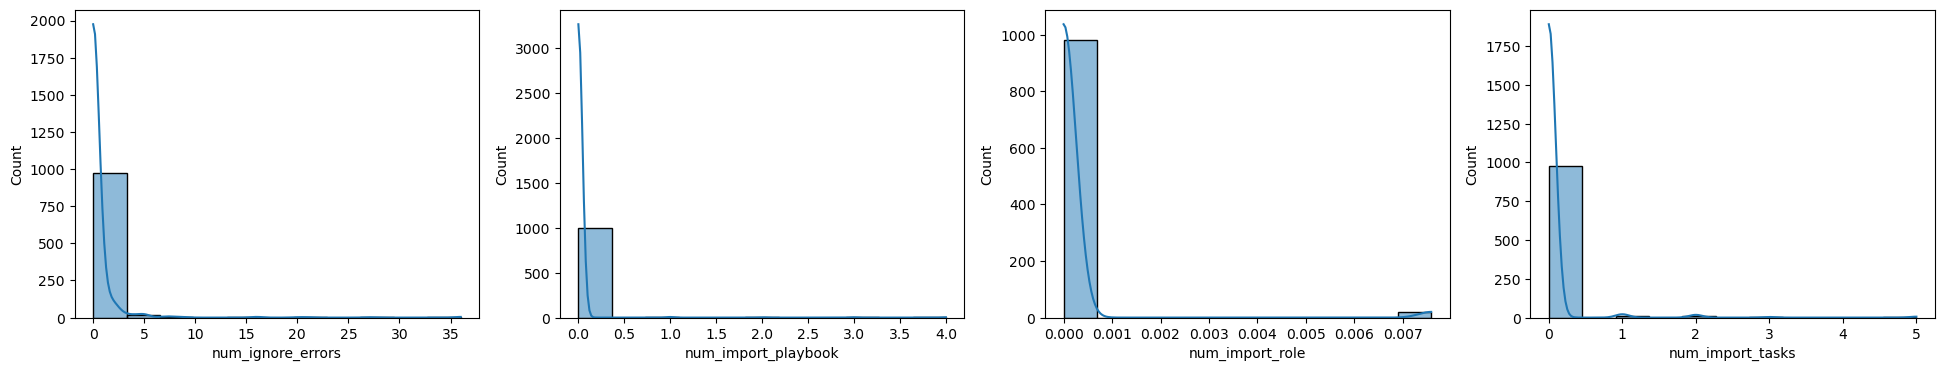

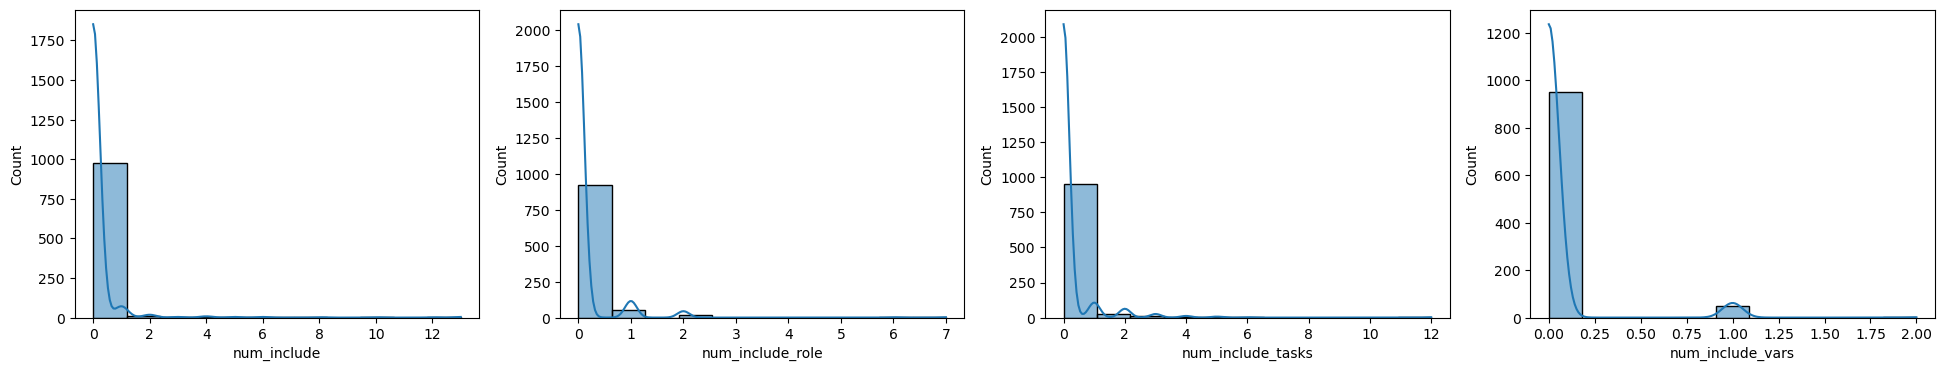

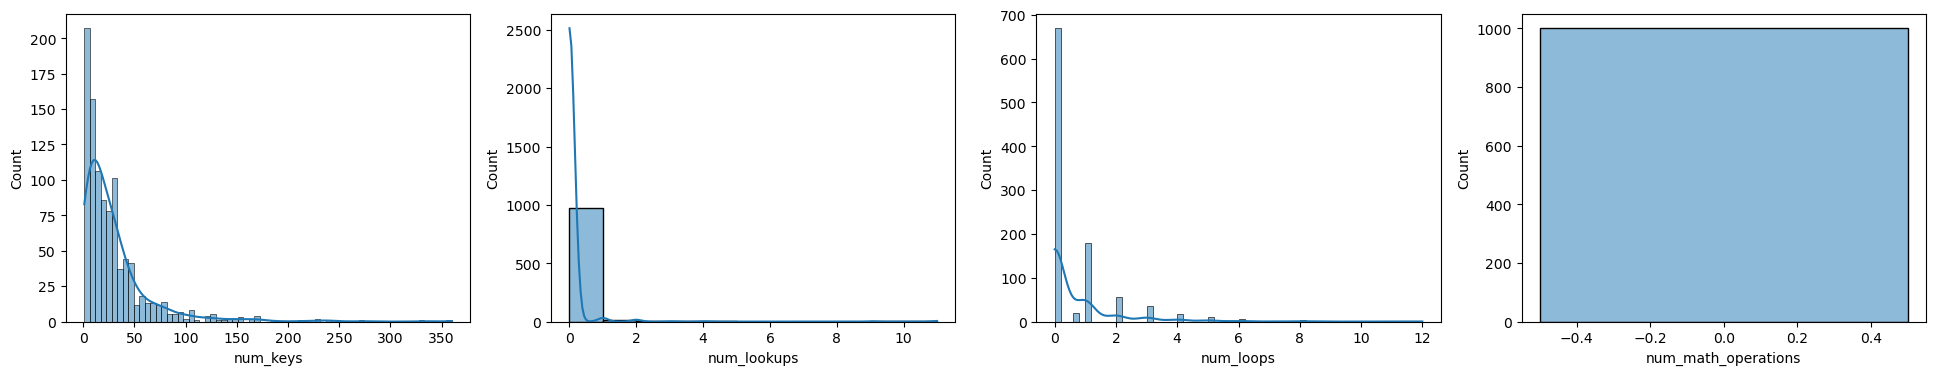

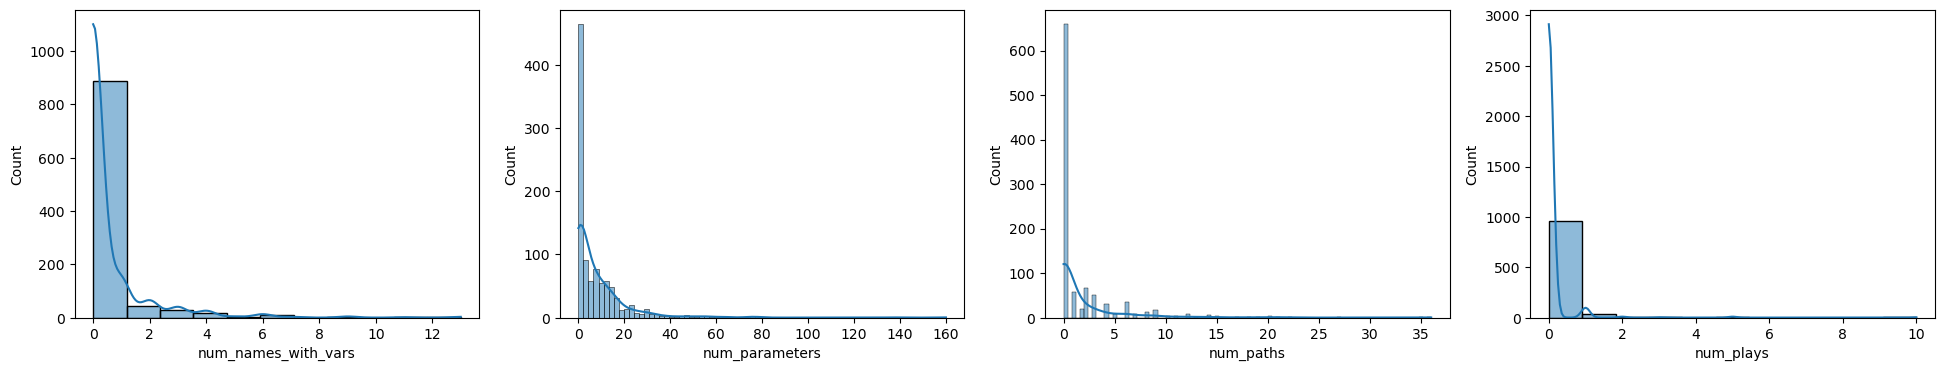

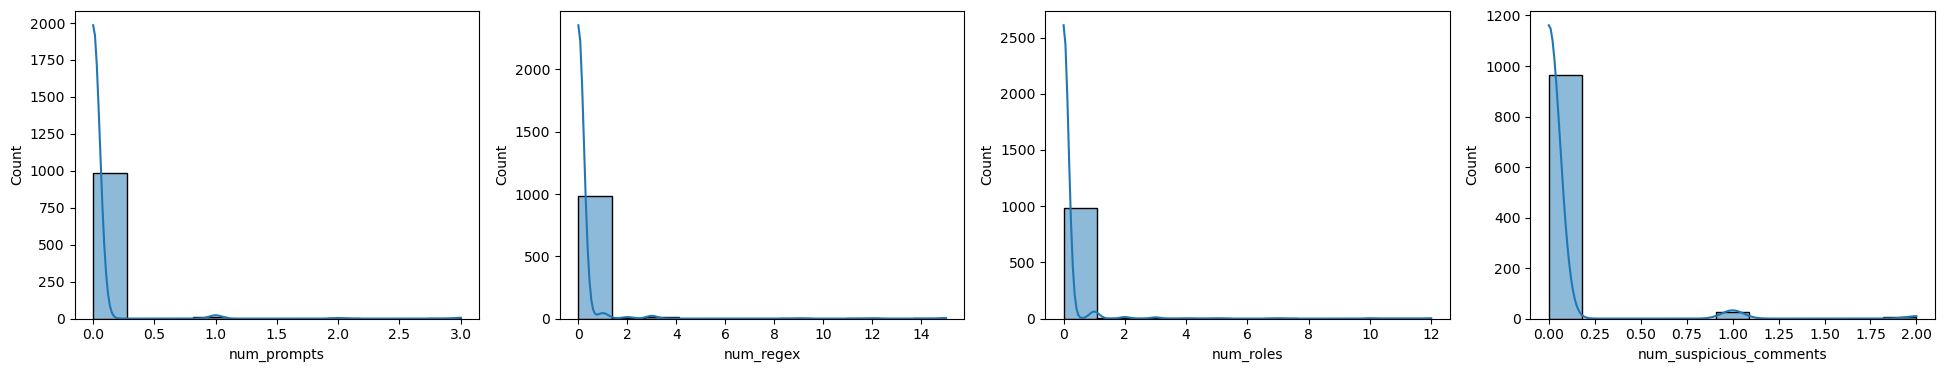

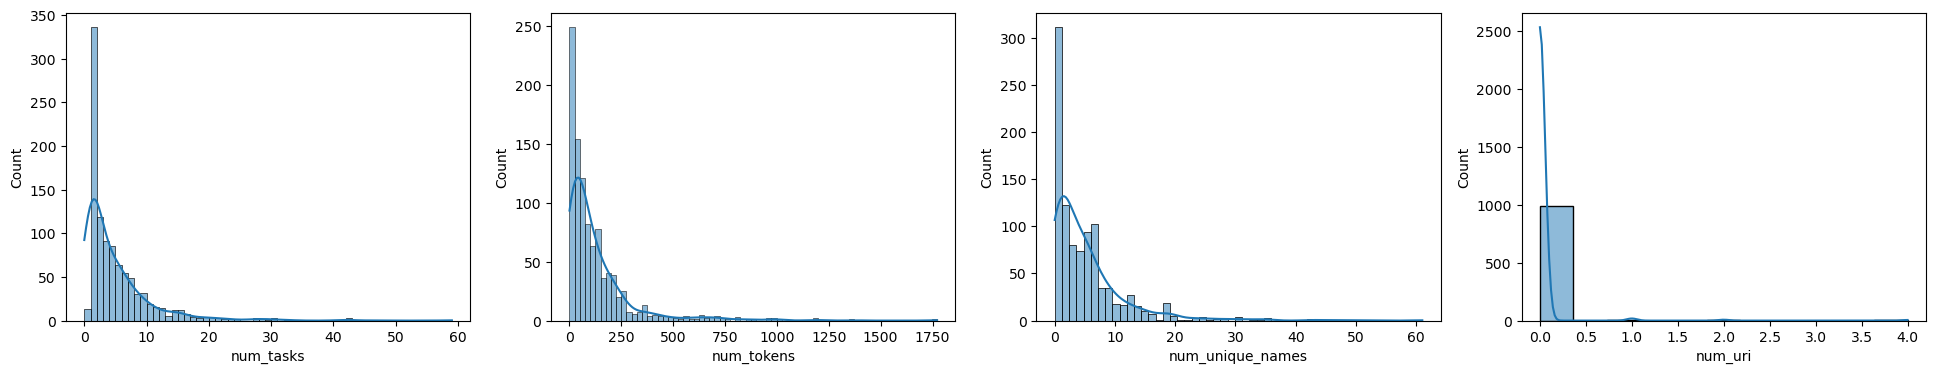

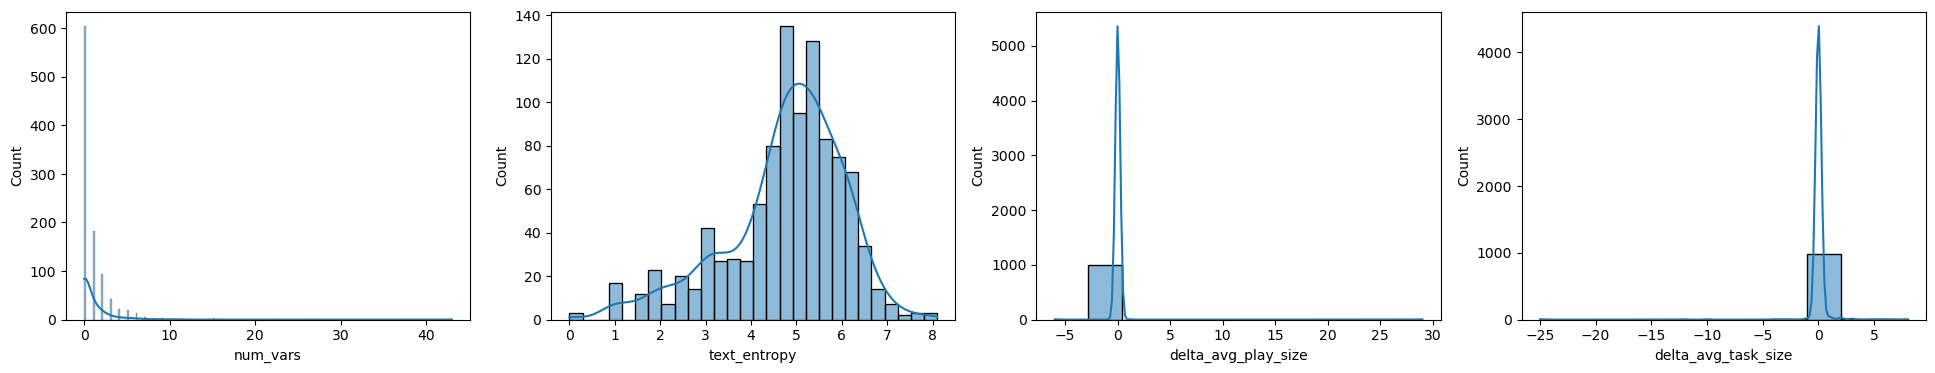

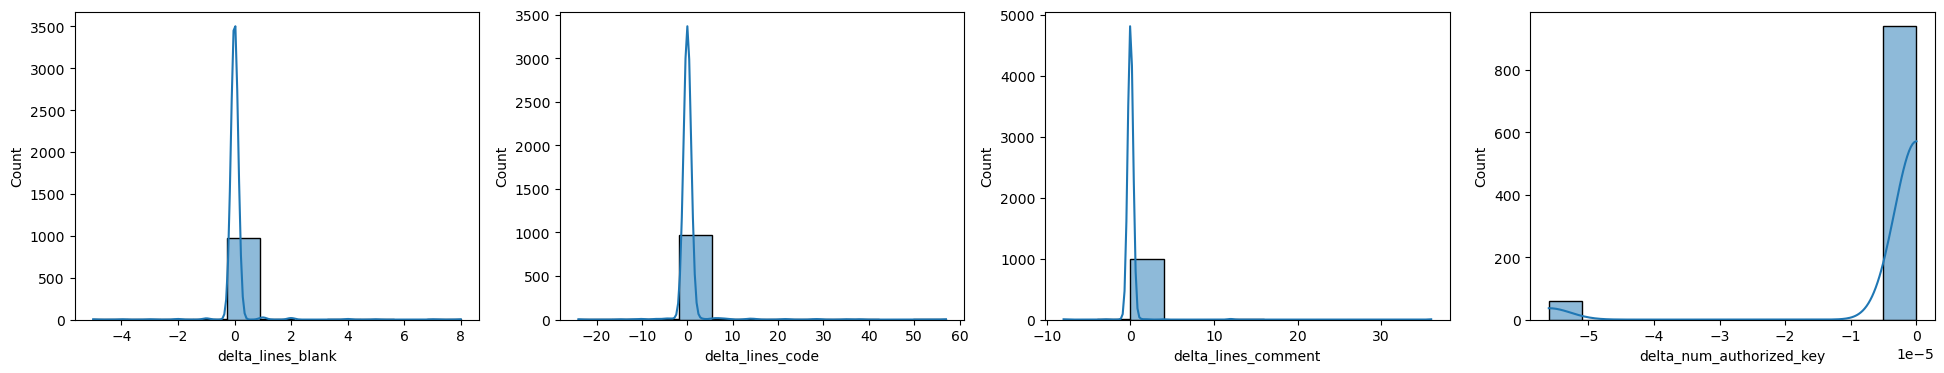

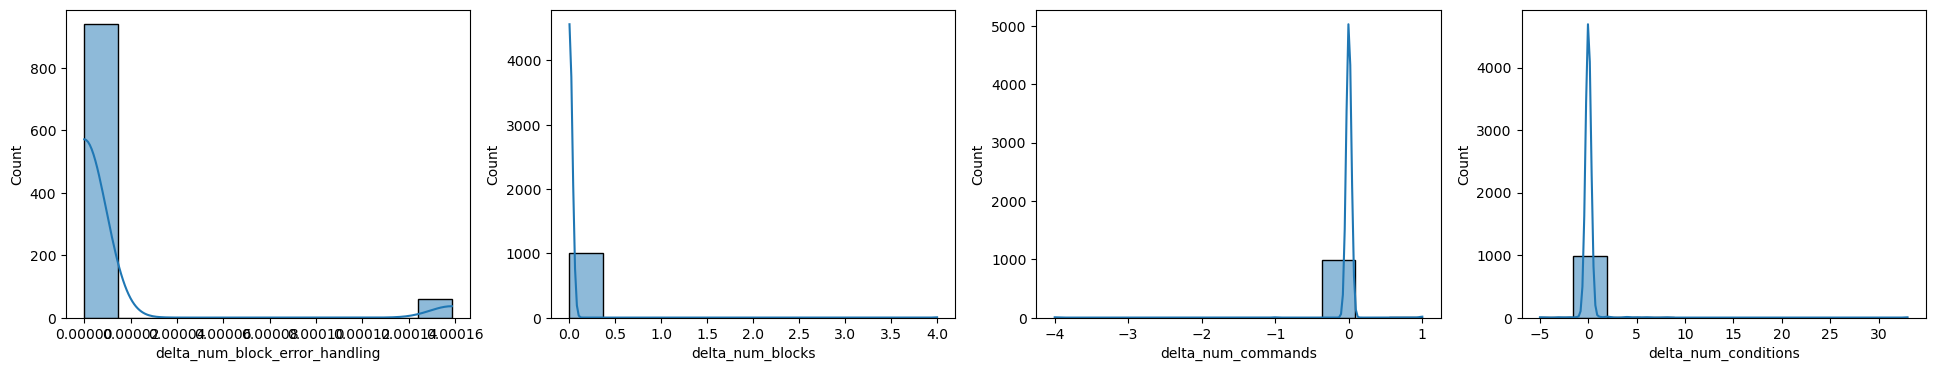

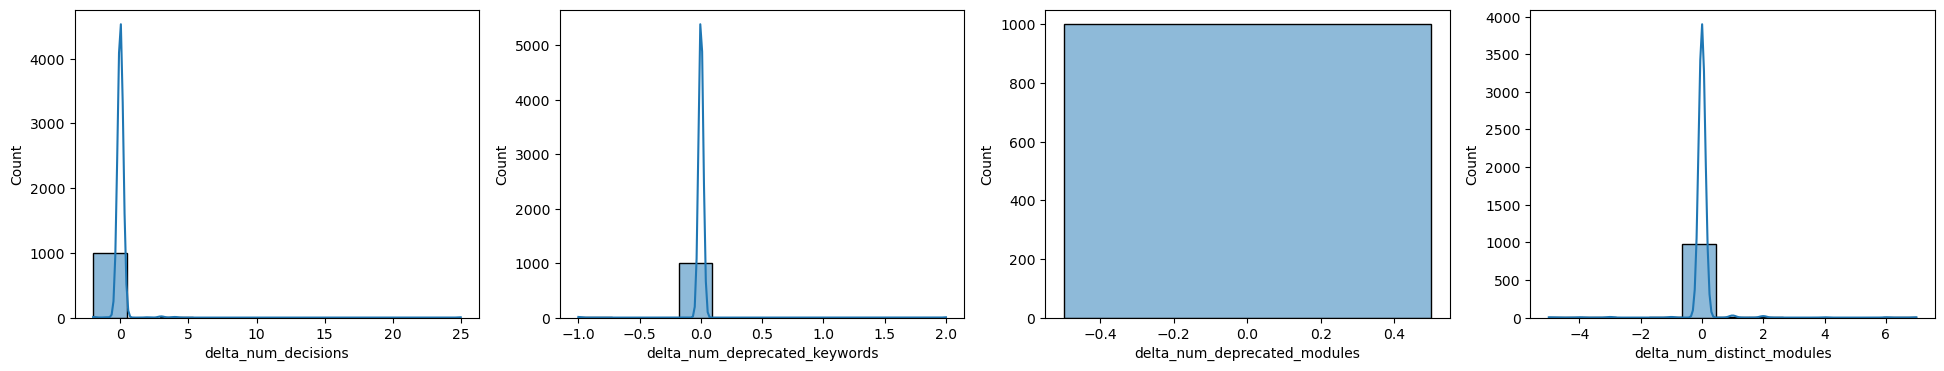

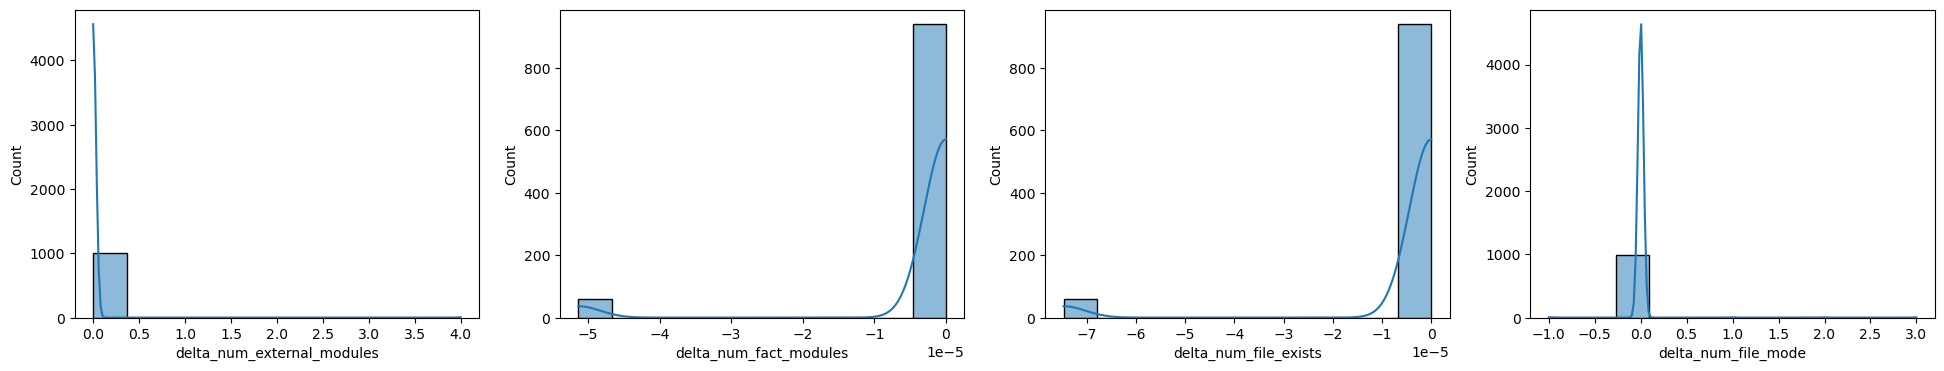

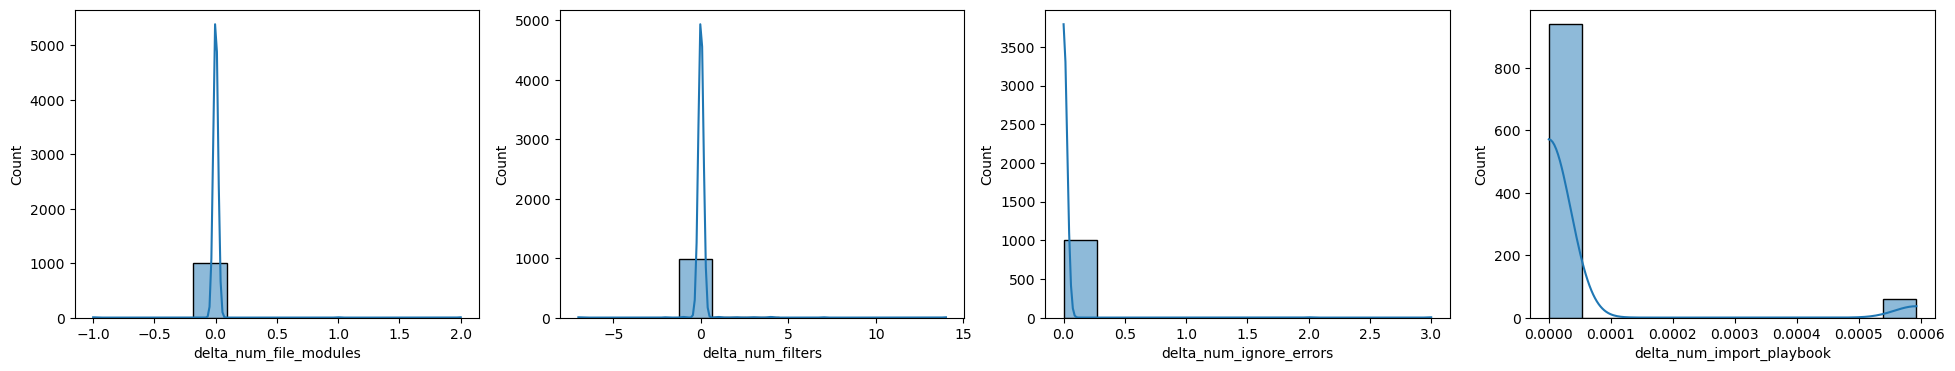

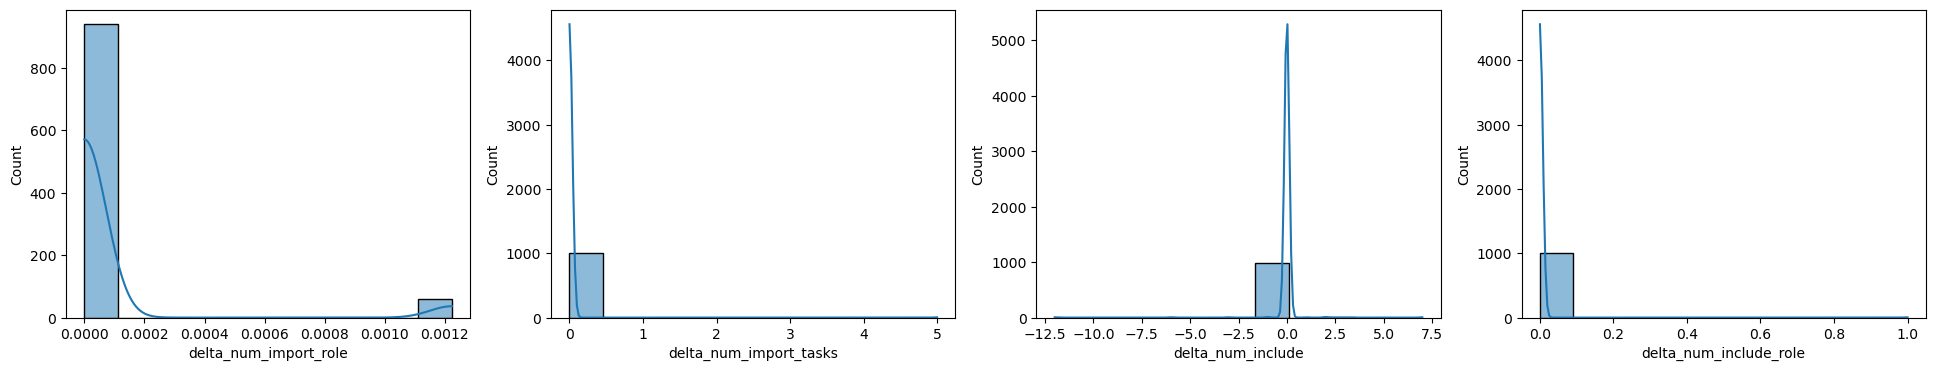

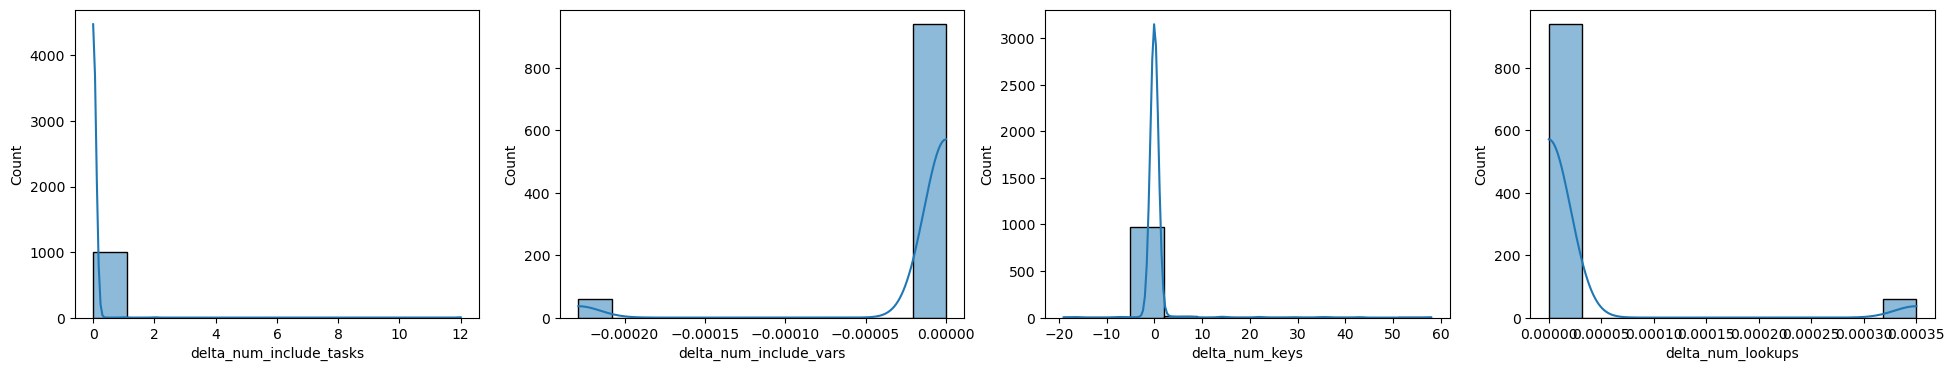

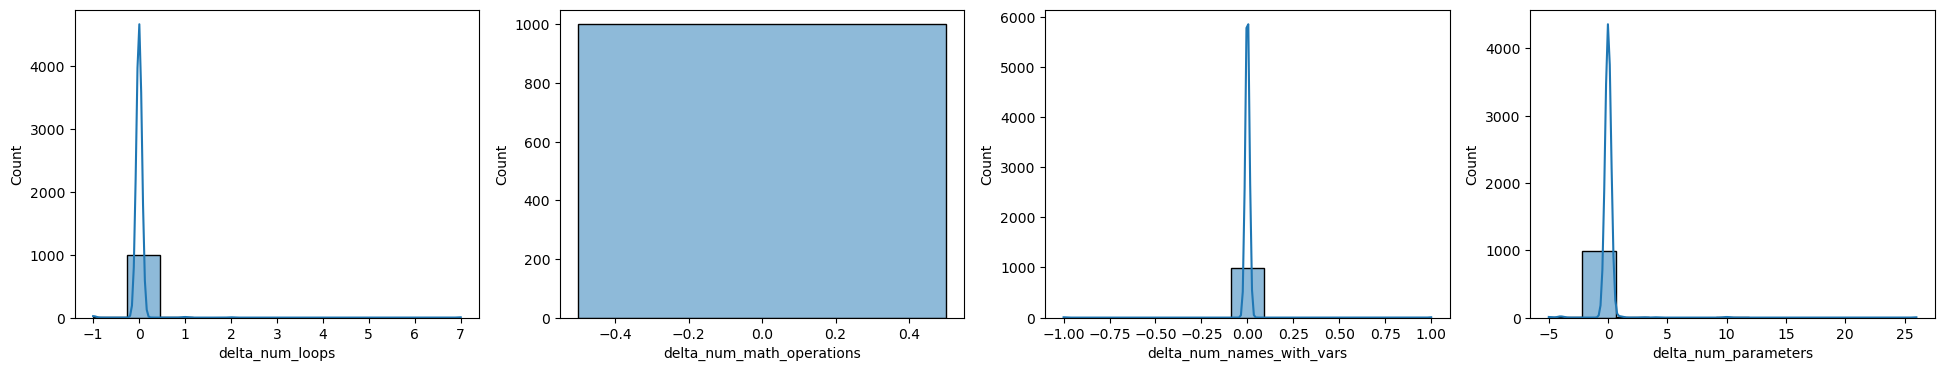

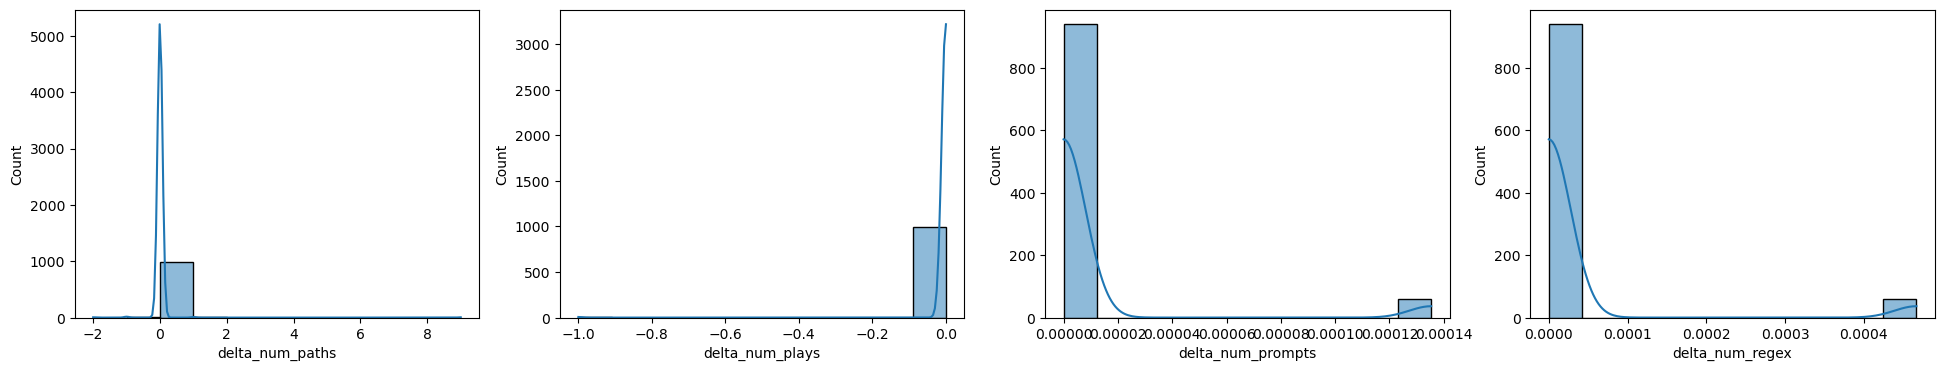

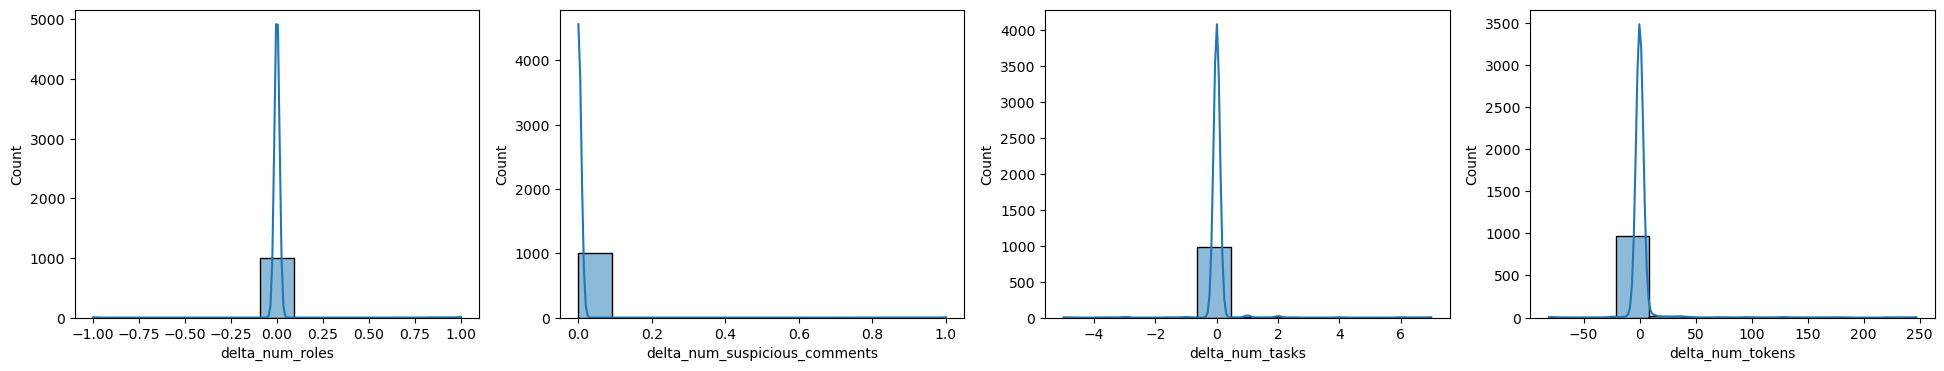

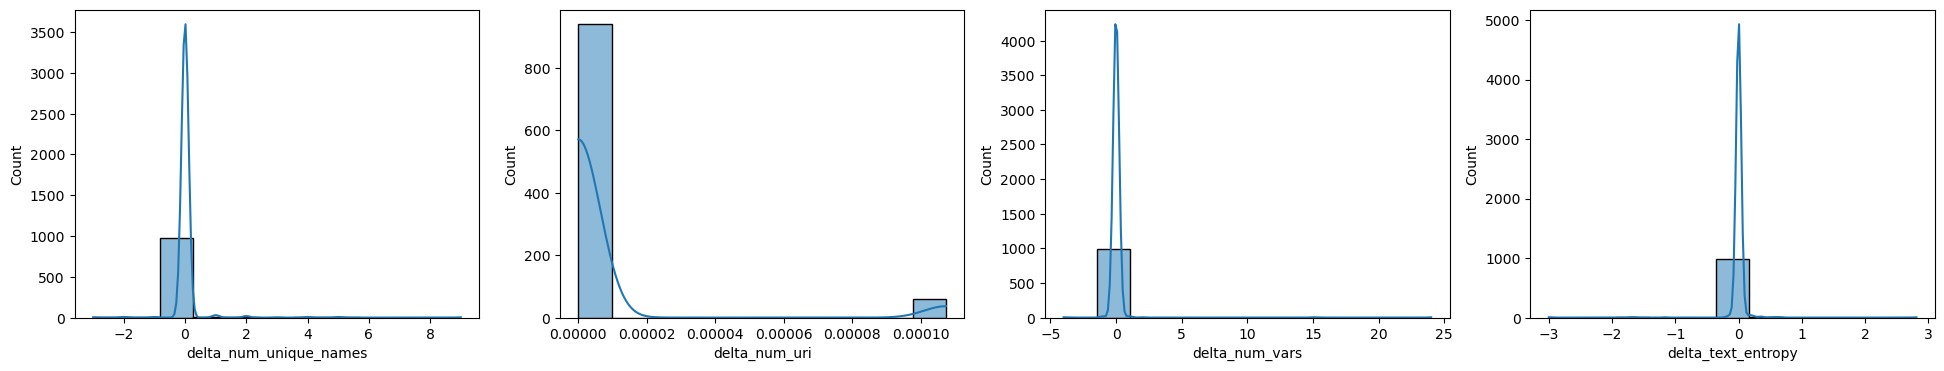

In [15]:
features = X_train.columns

for j in range(27):
    fig, axs = plt.subplots(1,4, figsize=(24, 4))
    for i, ax in zip(range(4), axs.flat):
        sns.histplot(data=X_train.sample(n=1000, random_state=RANDOM_STATE), x=features[4*j+i], kde=True, ax=ax)
    plt.show()

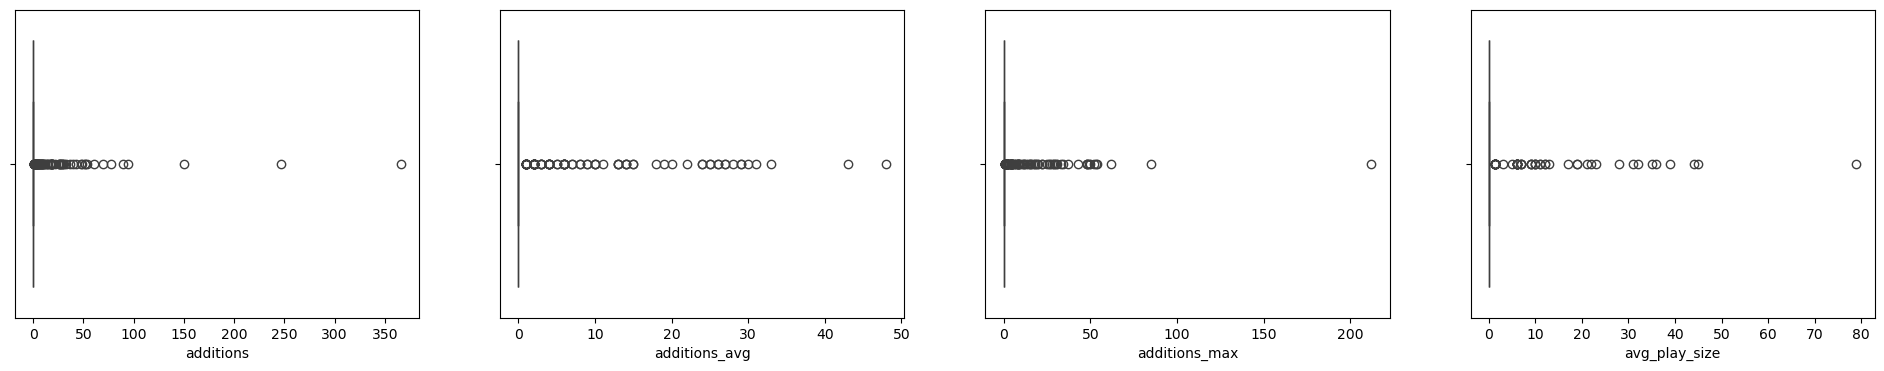

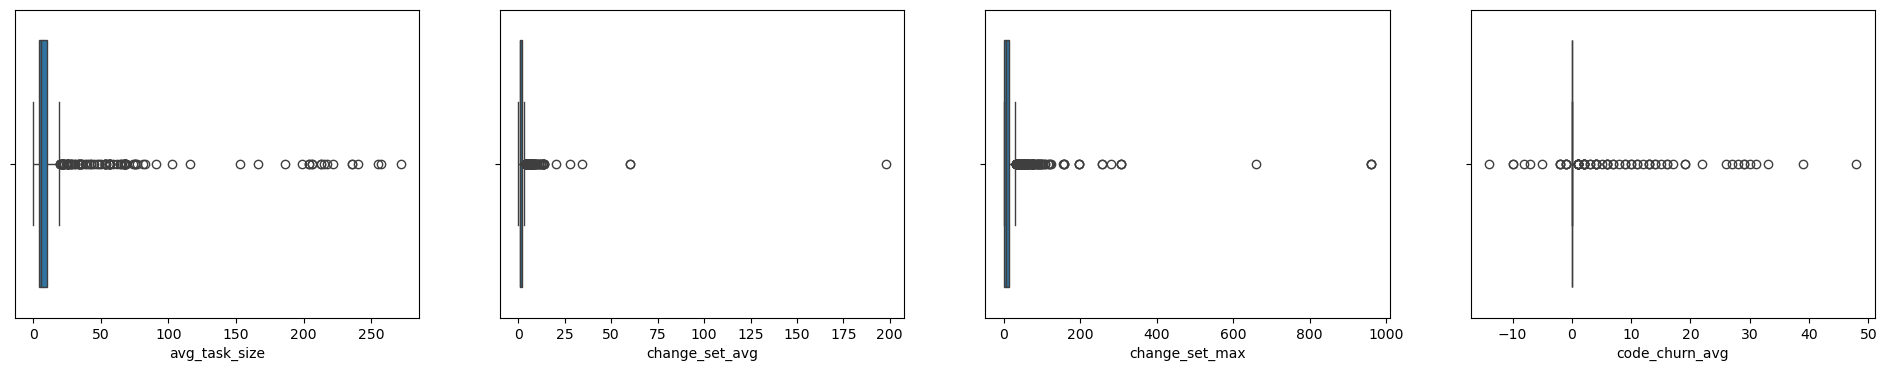

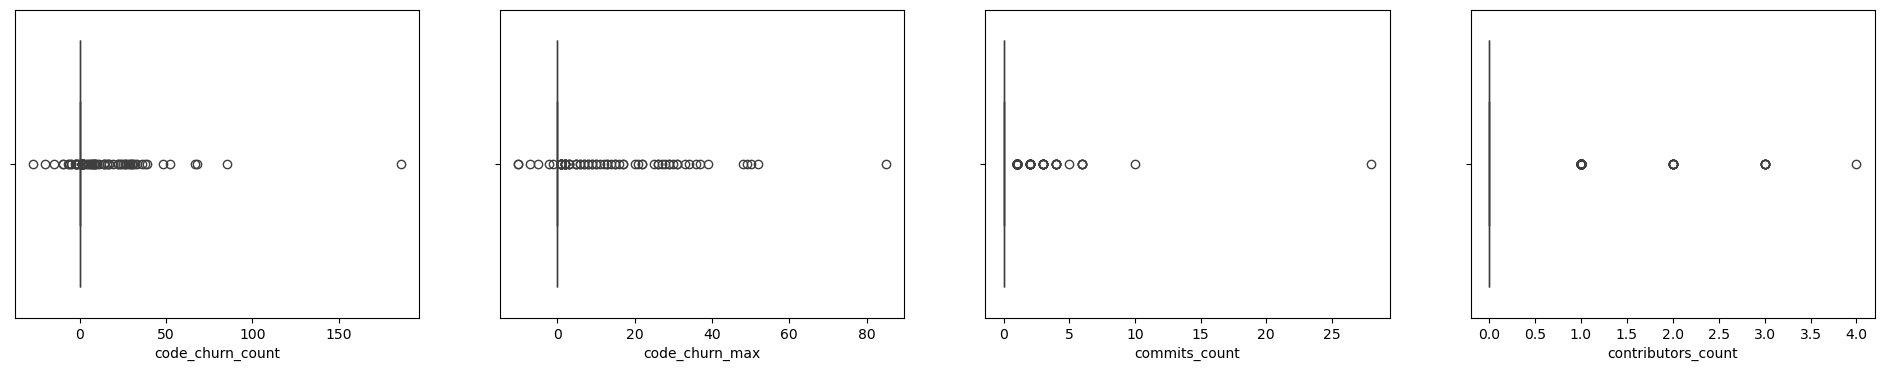

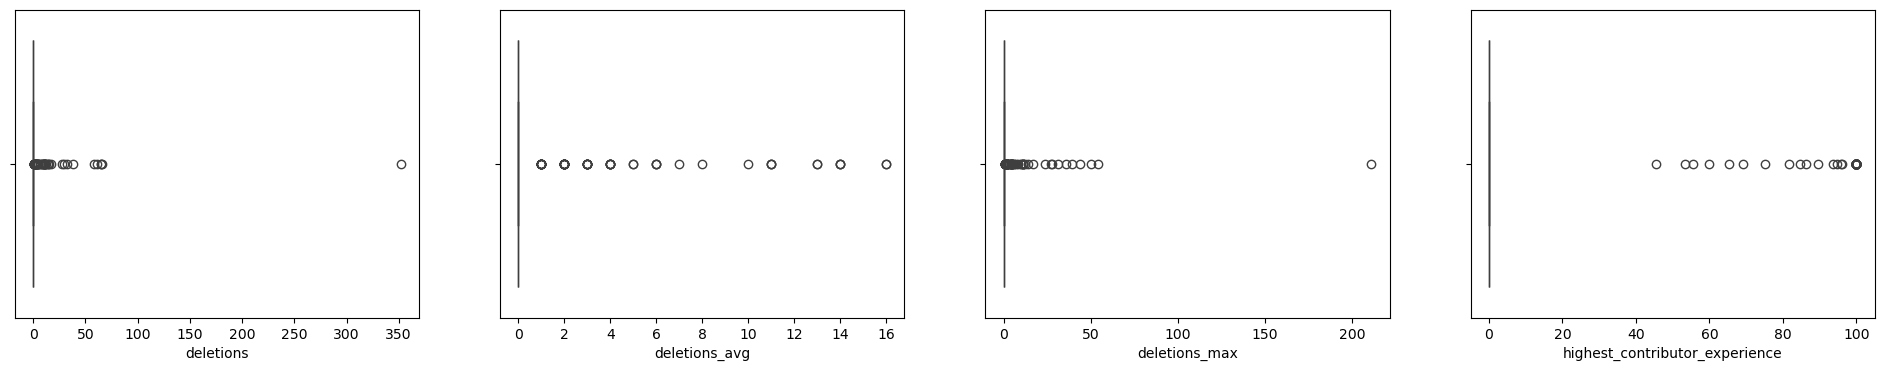

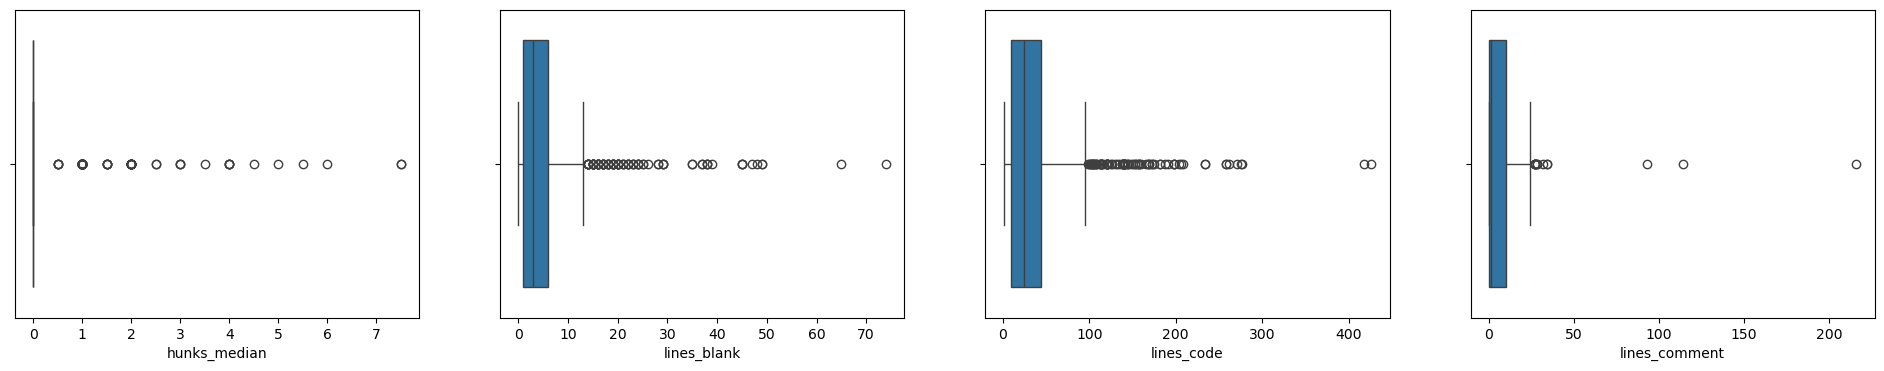

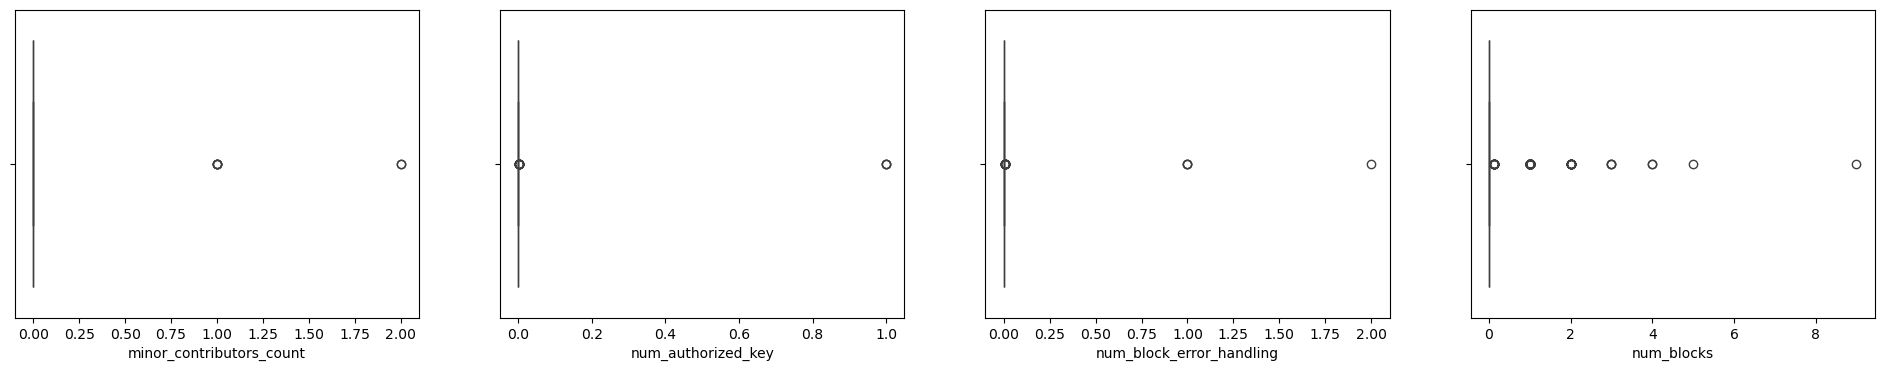

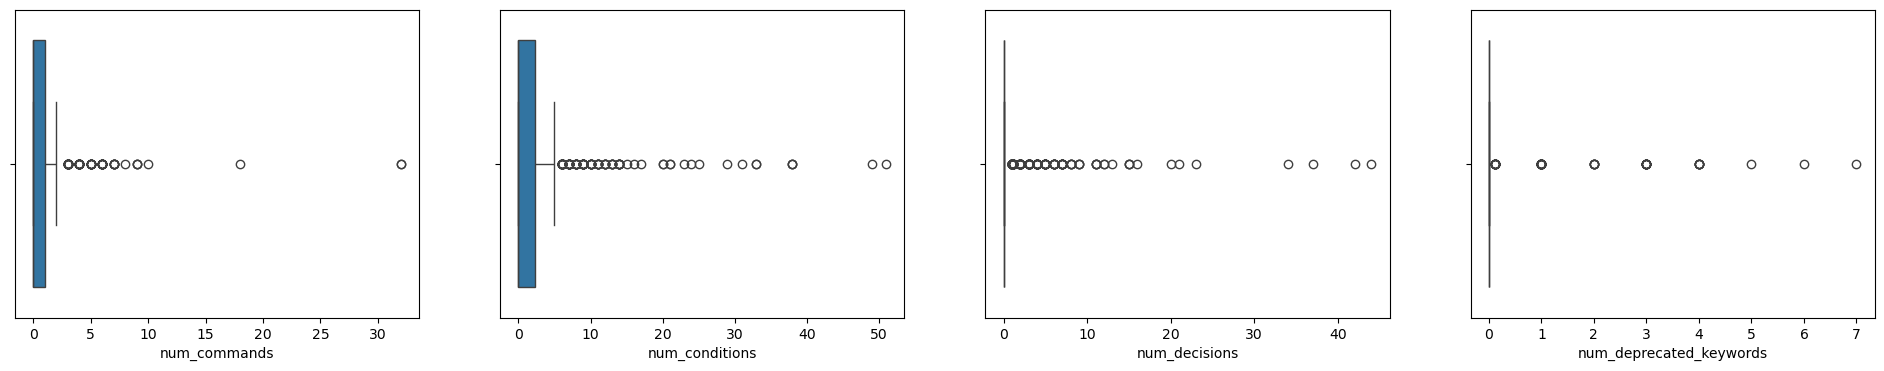

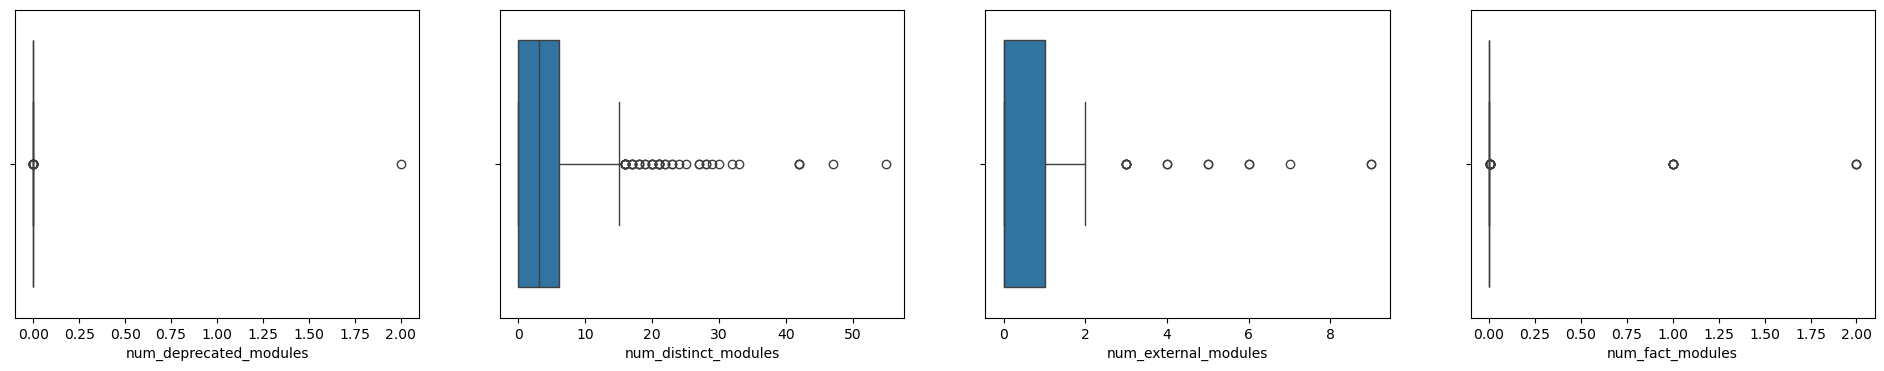

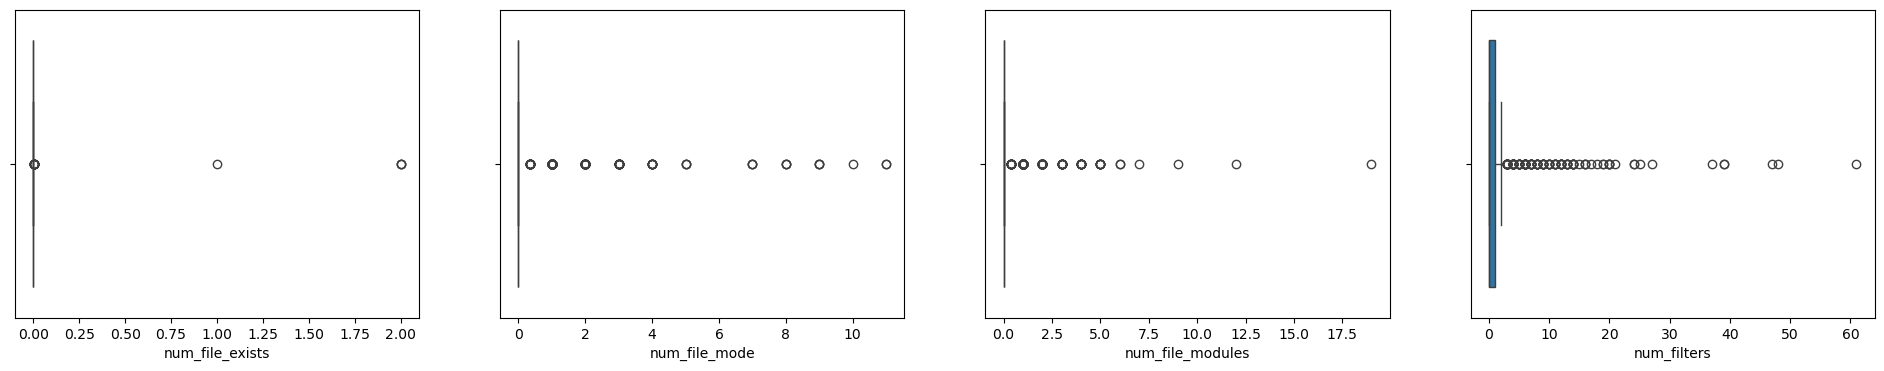

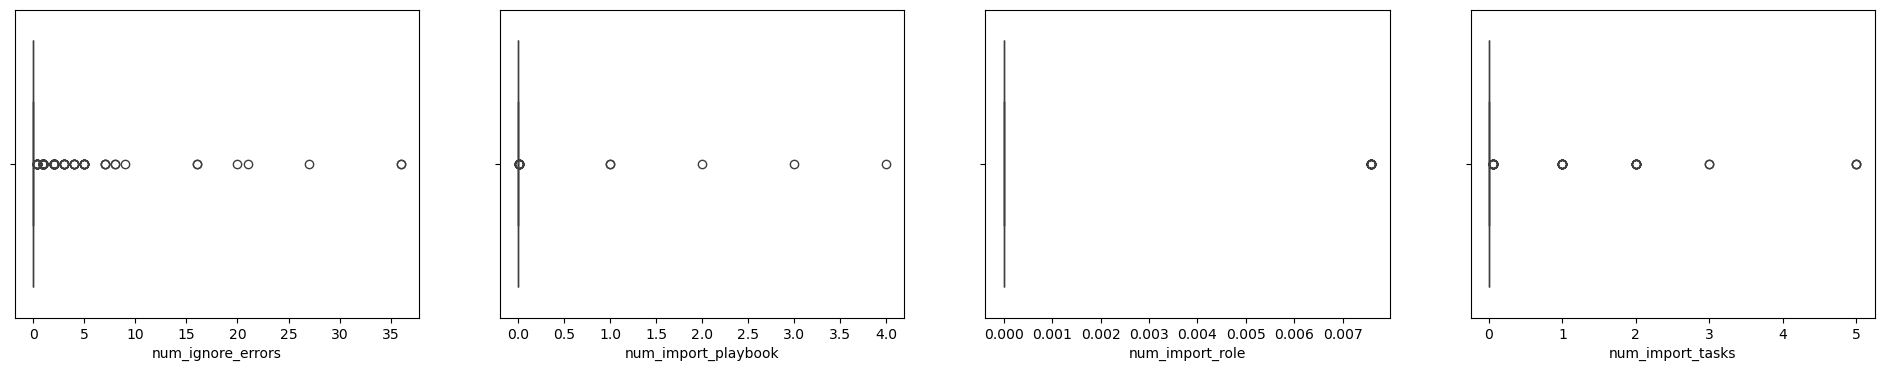

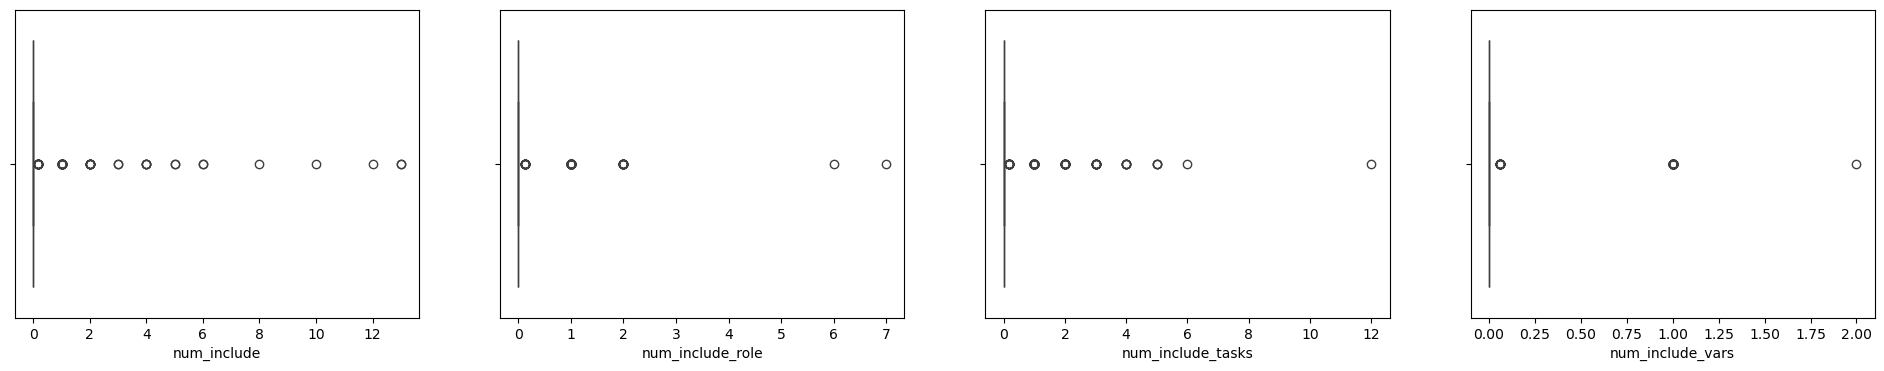

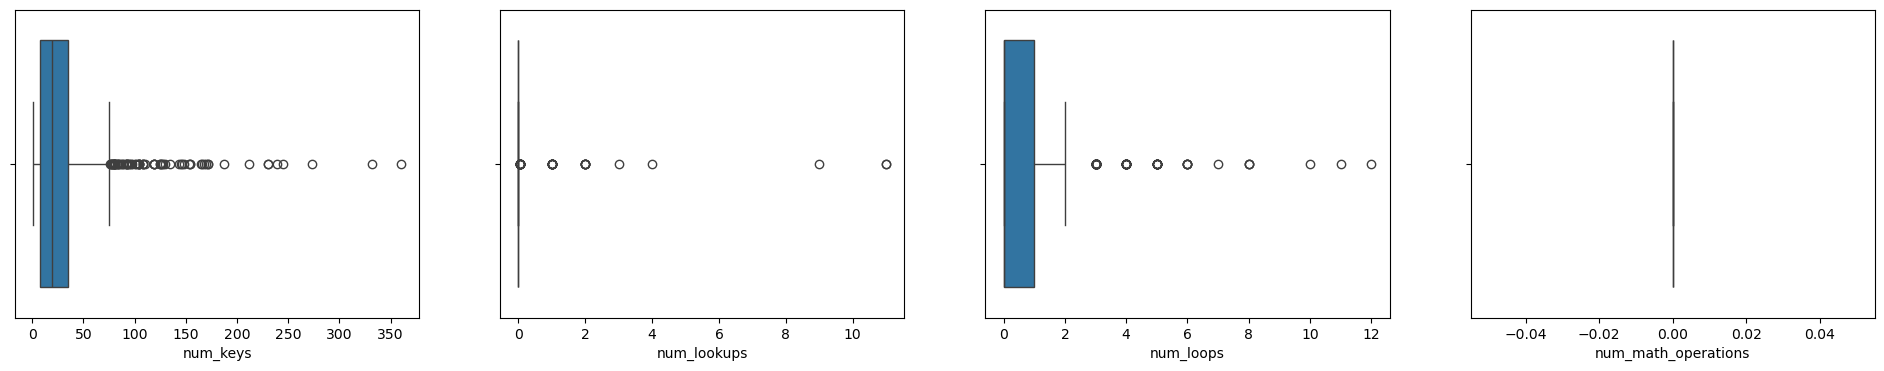

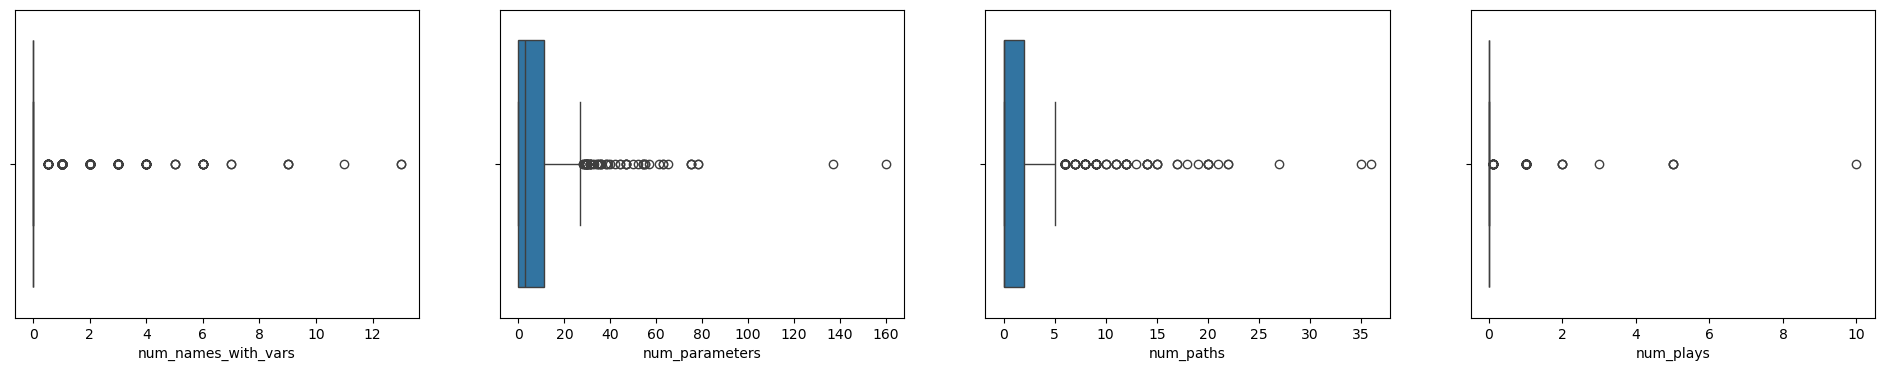

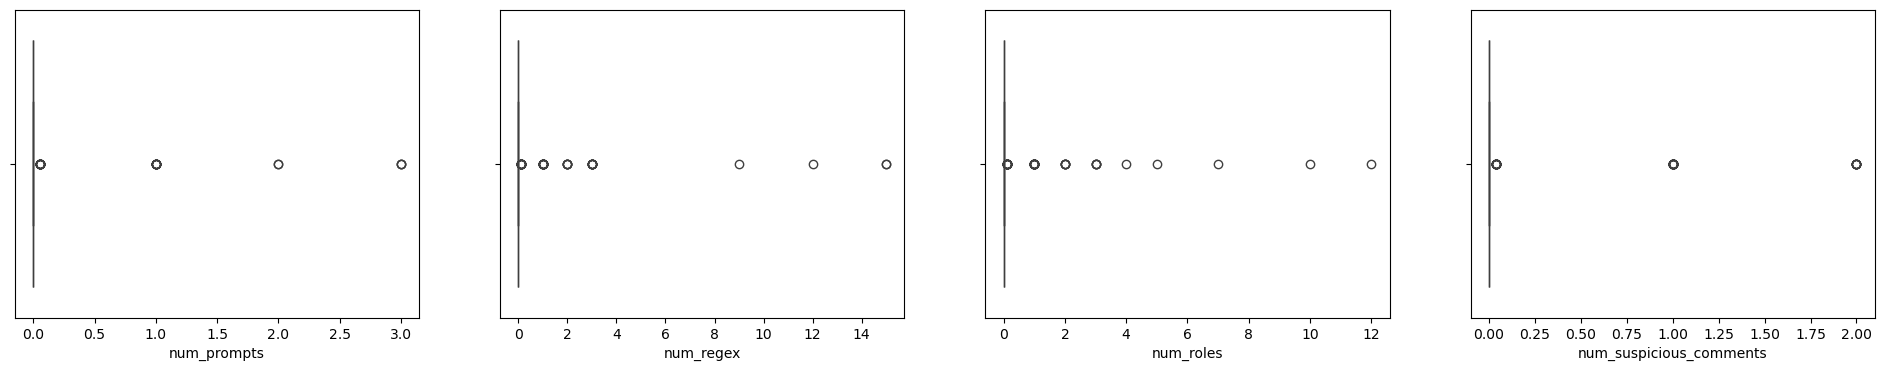

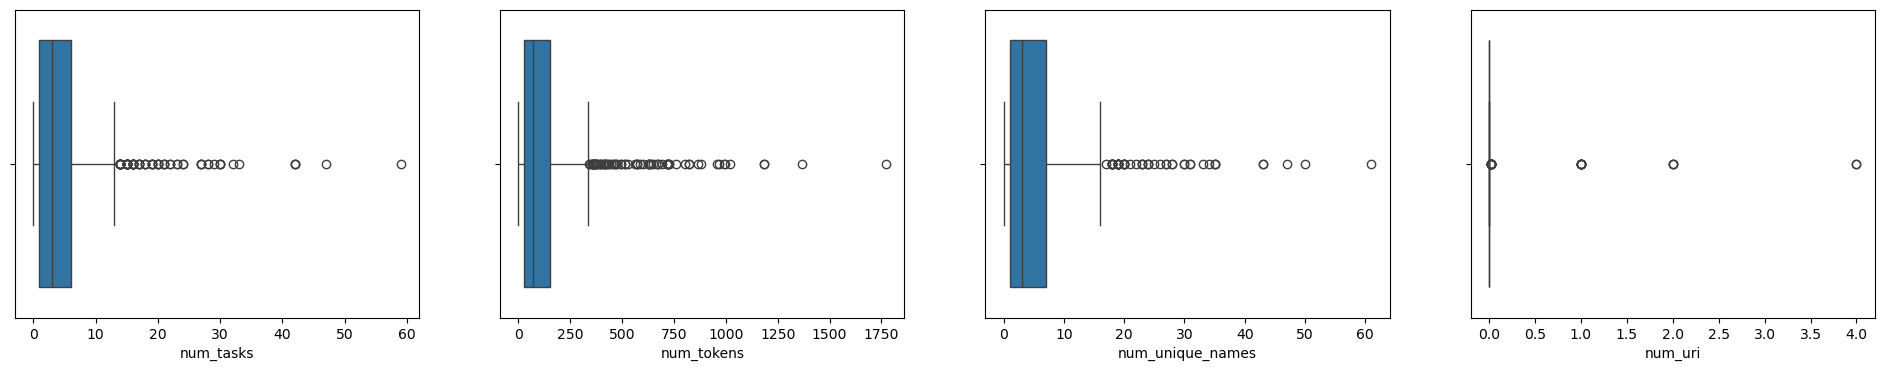

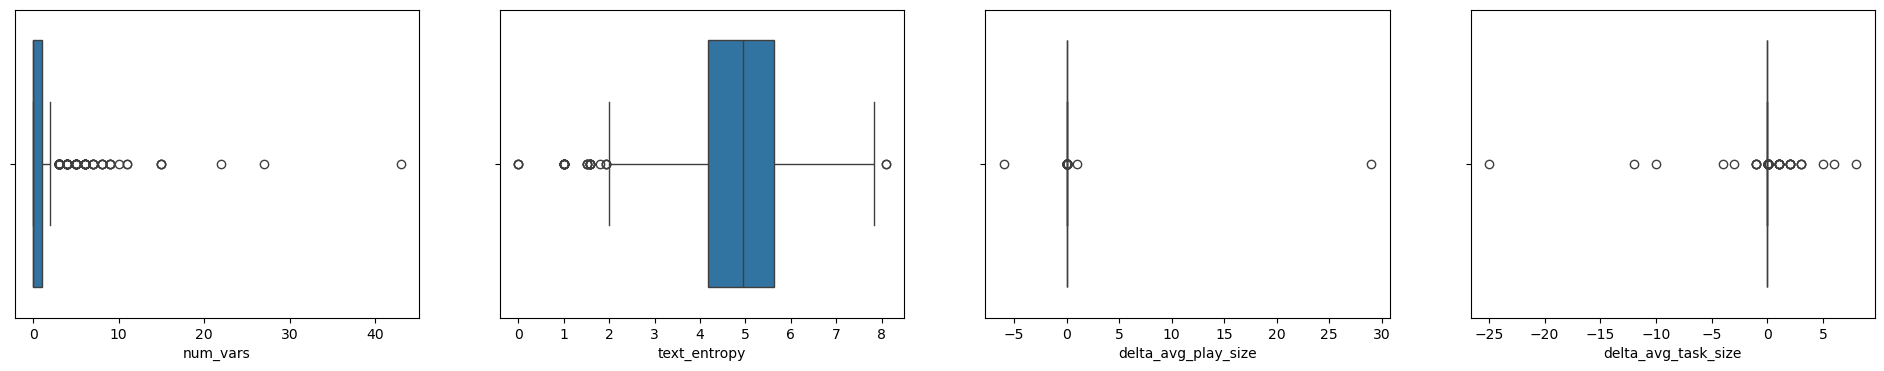

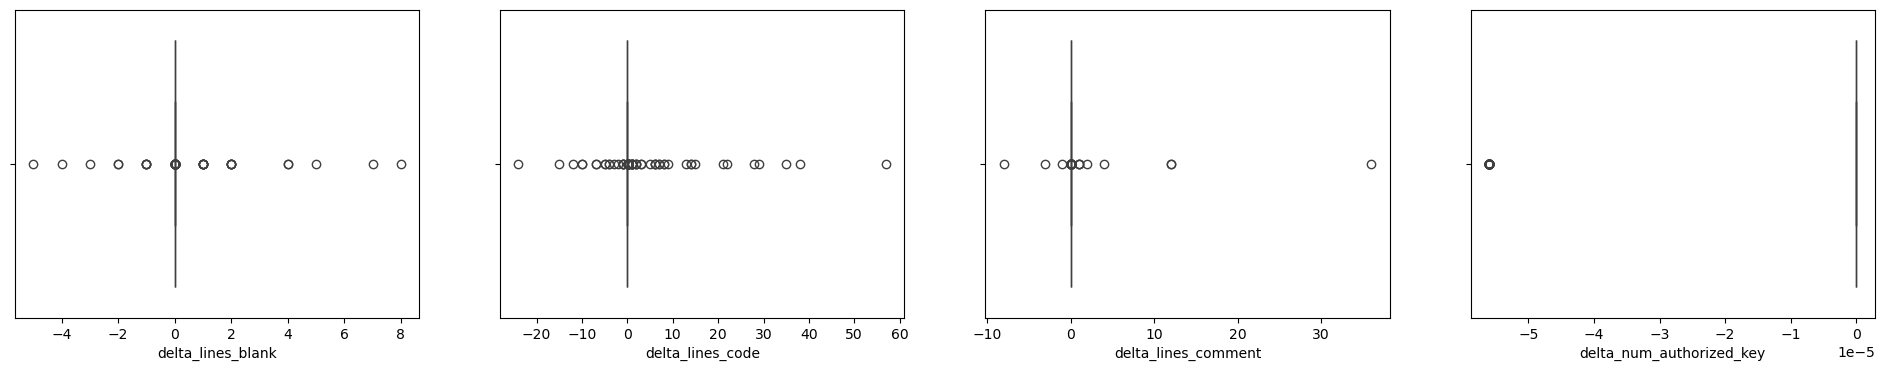

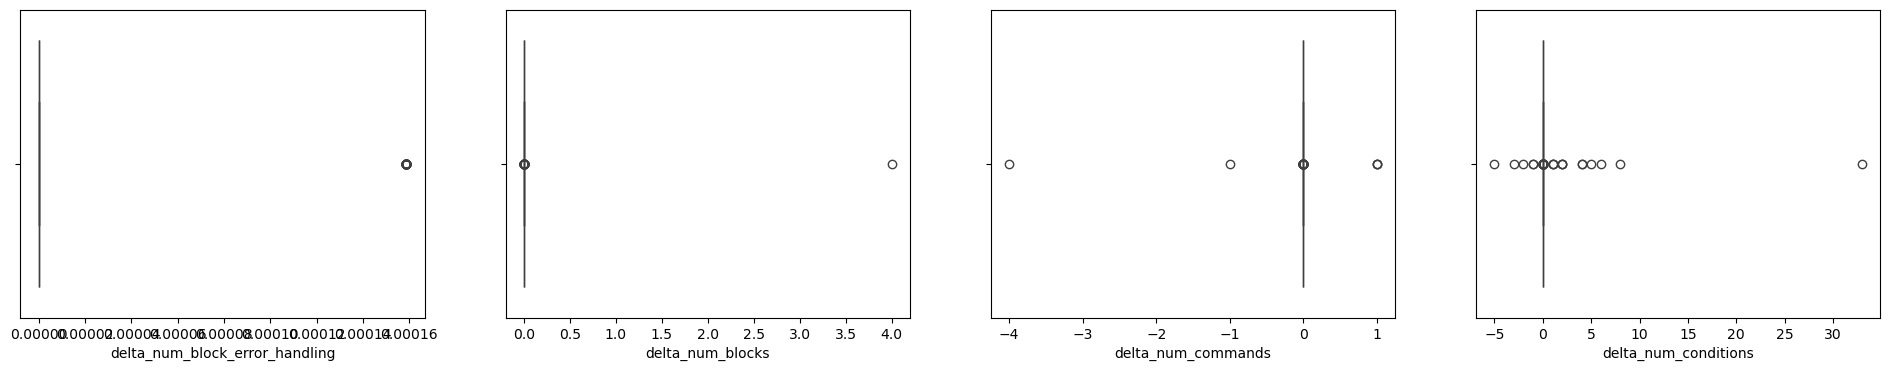

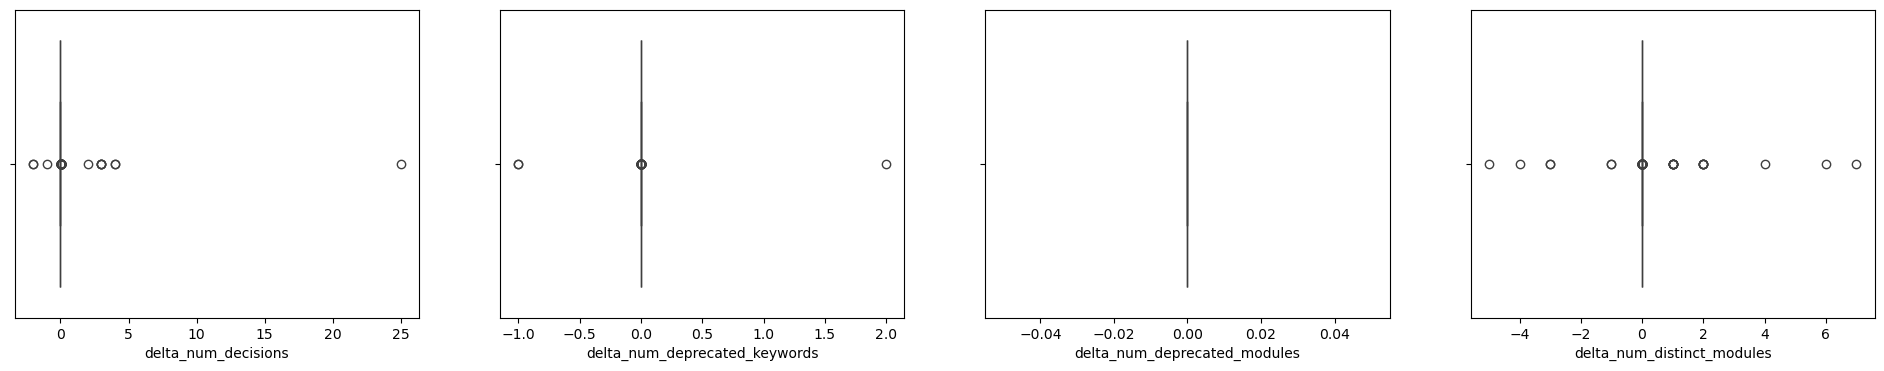

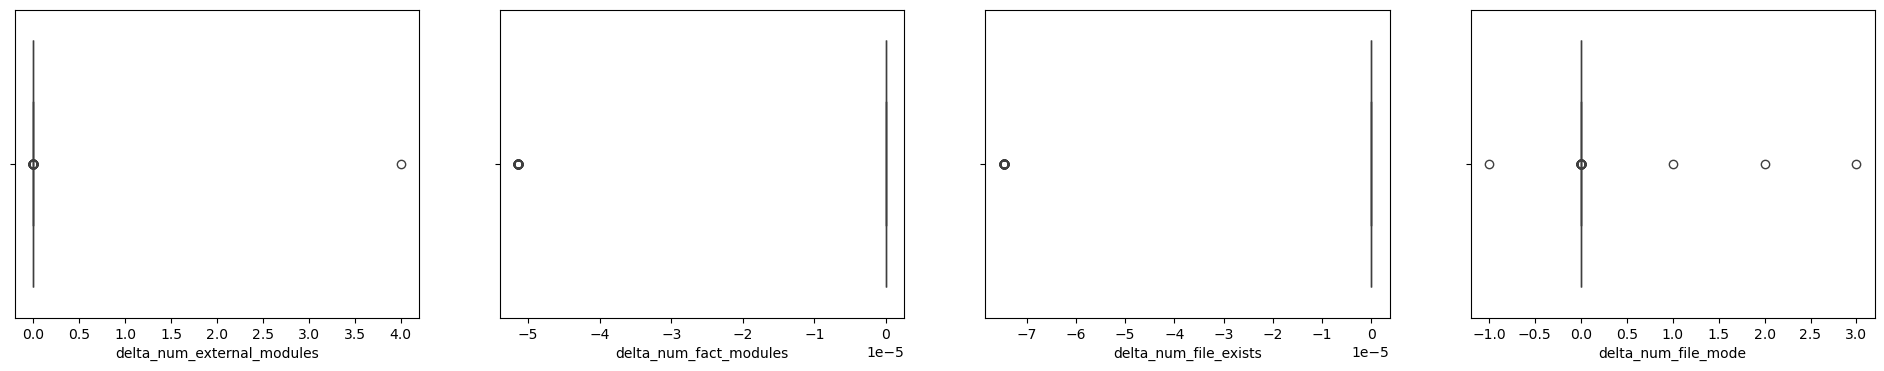

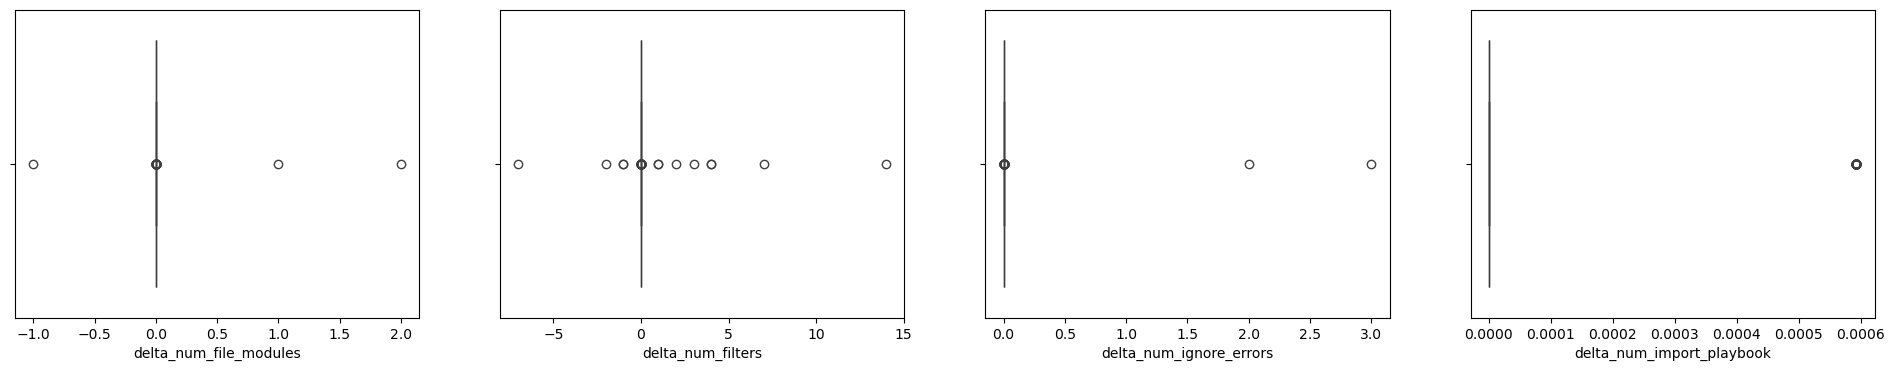

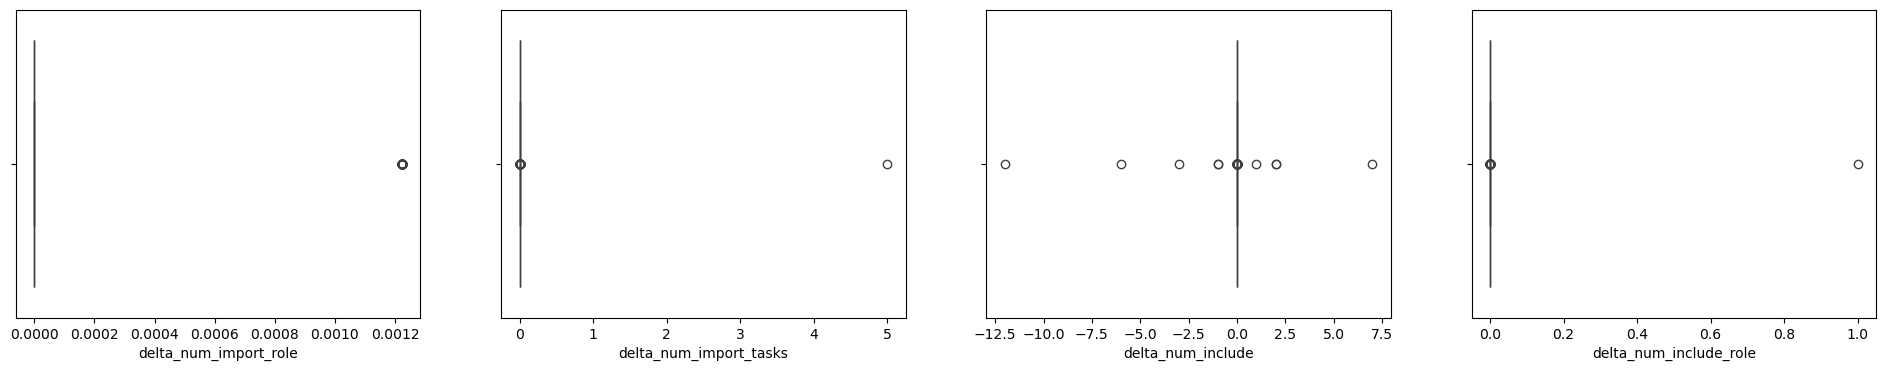

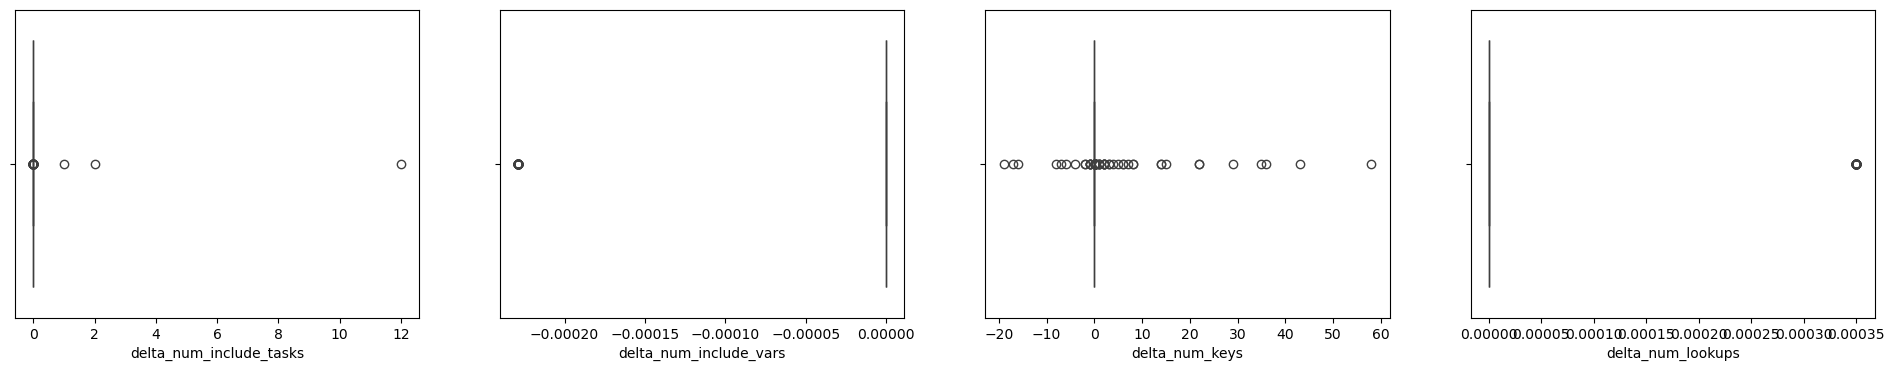

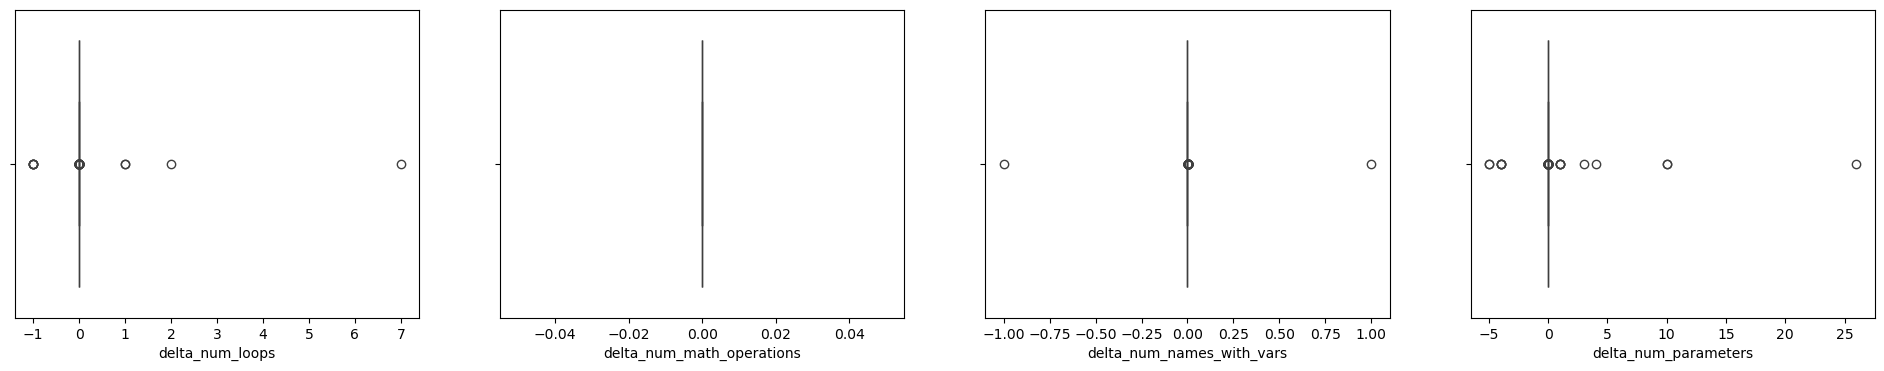

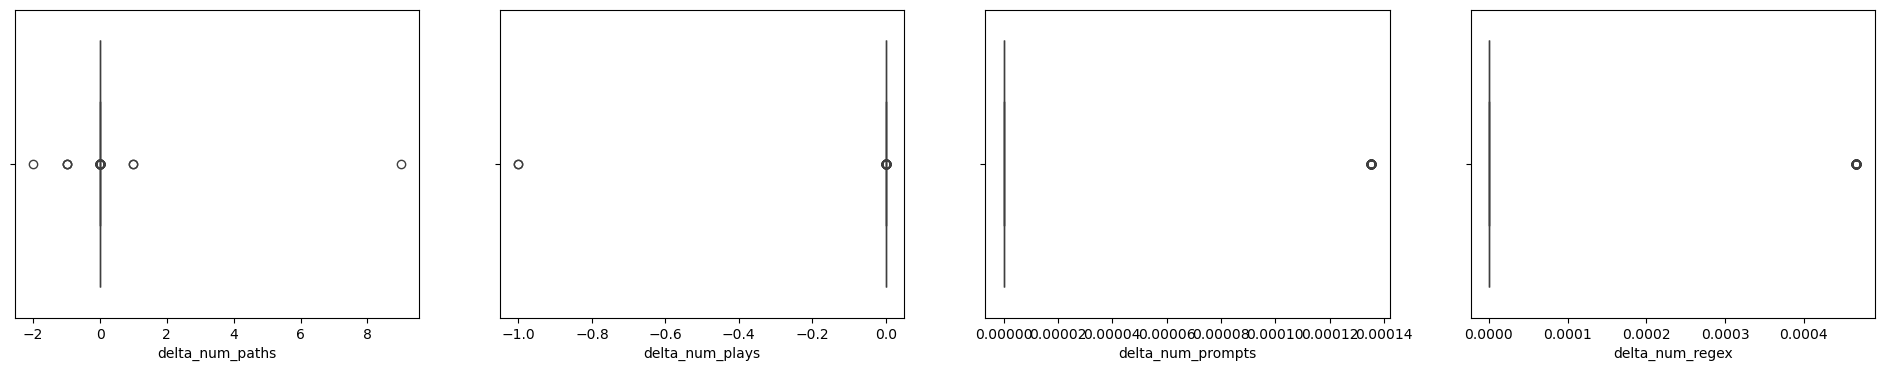

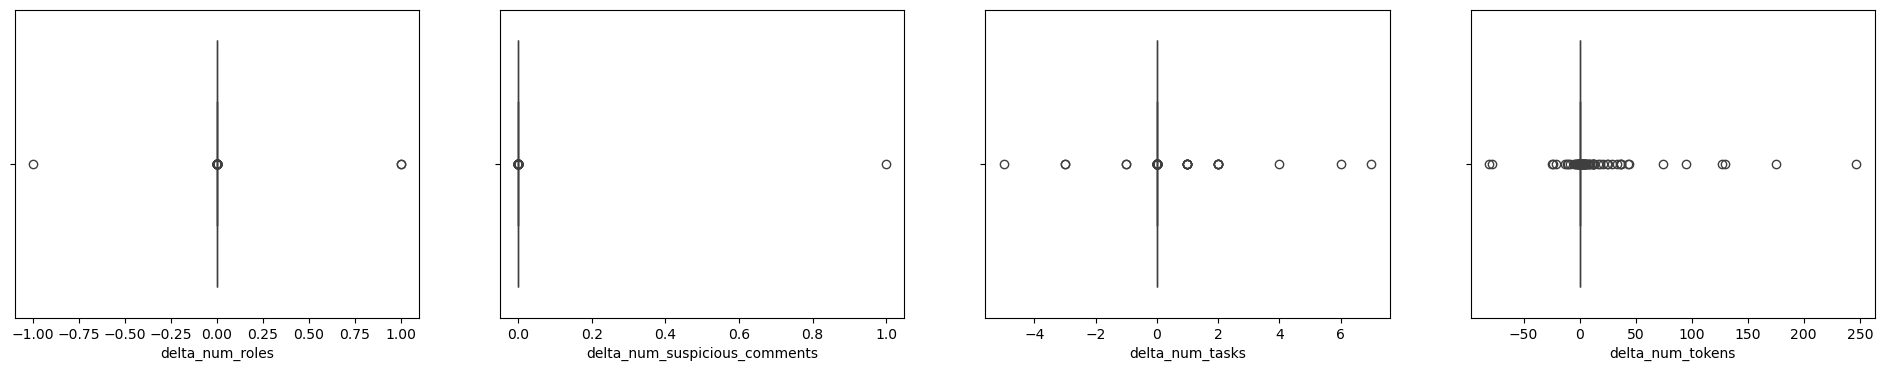

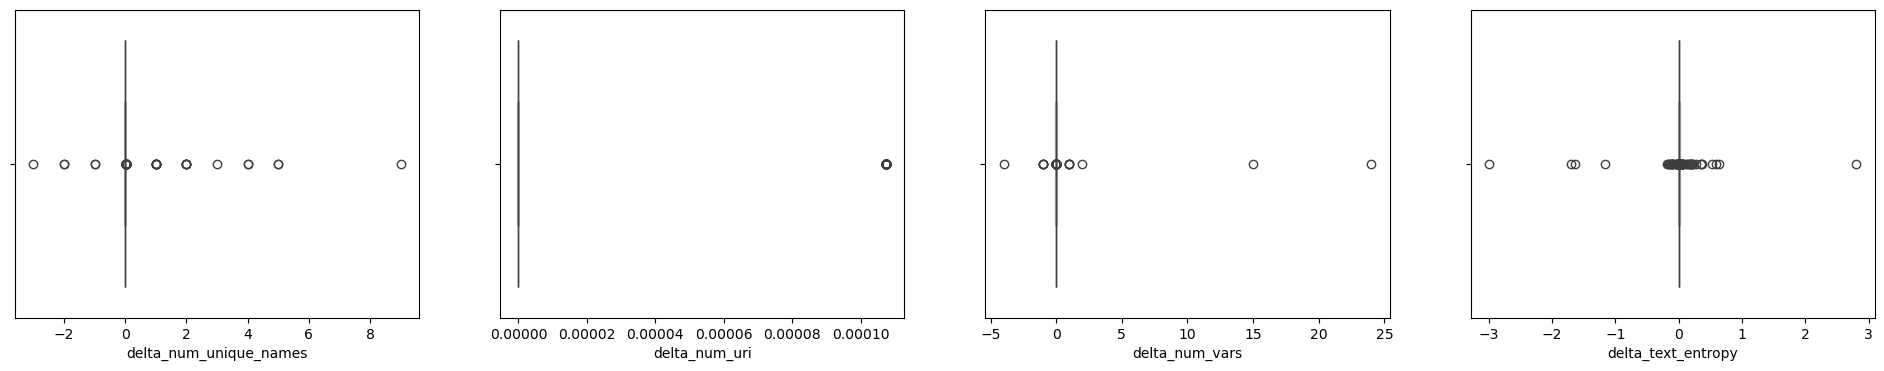

In [16]:
for j in range(27):
    fig, axs = plt.subplots(1,4, figsize=(24, 4))
    for i, ax in zip(range(4), axs.flat):
        sns.boxplot(data=X_train.sample(n=1000, random_state=RANDOM_STATE), x=features[4*j+i], ax=ax)
    plt.show()

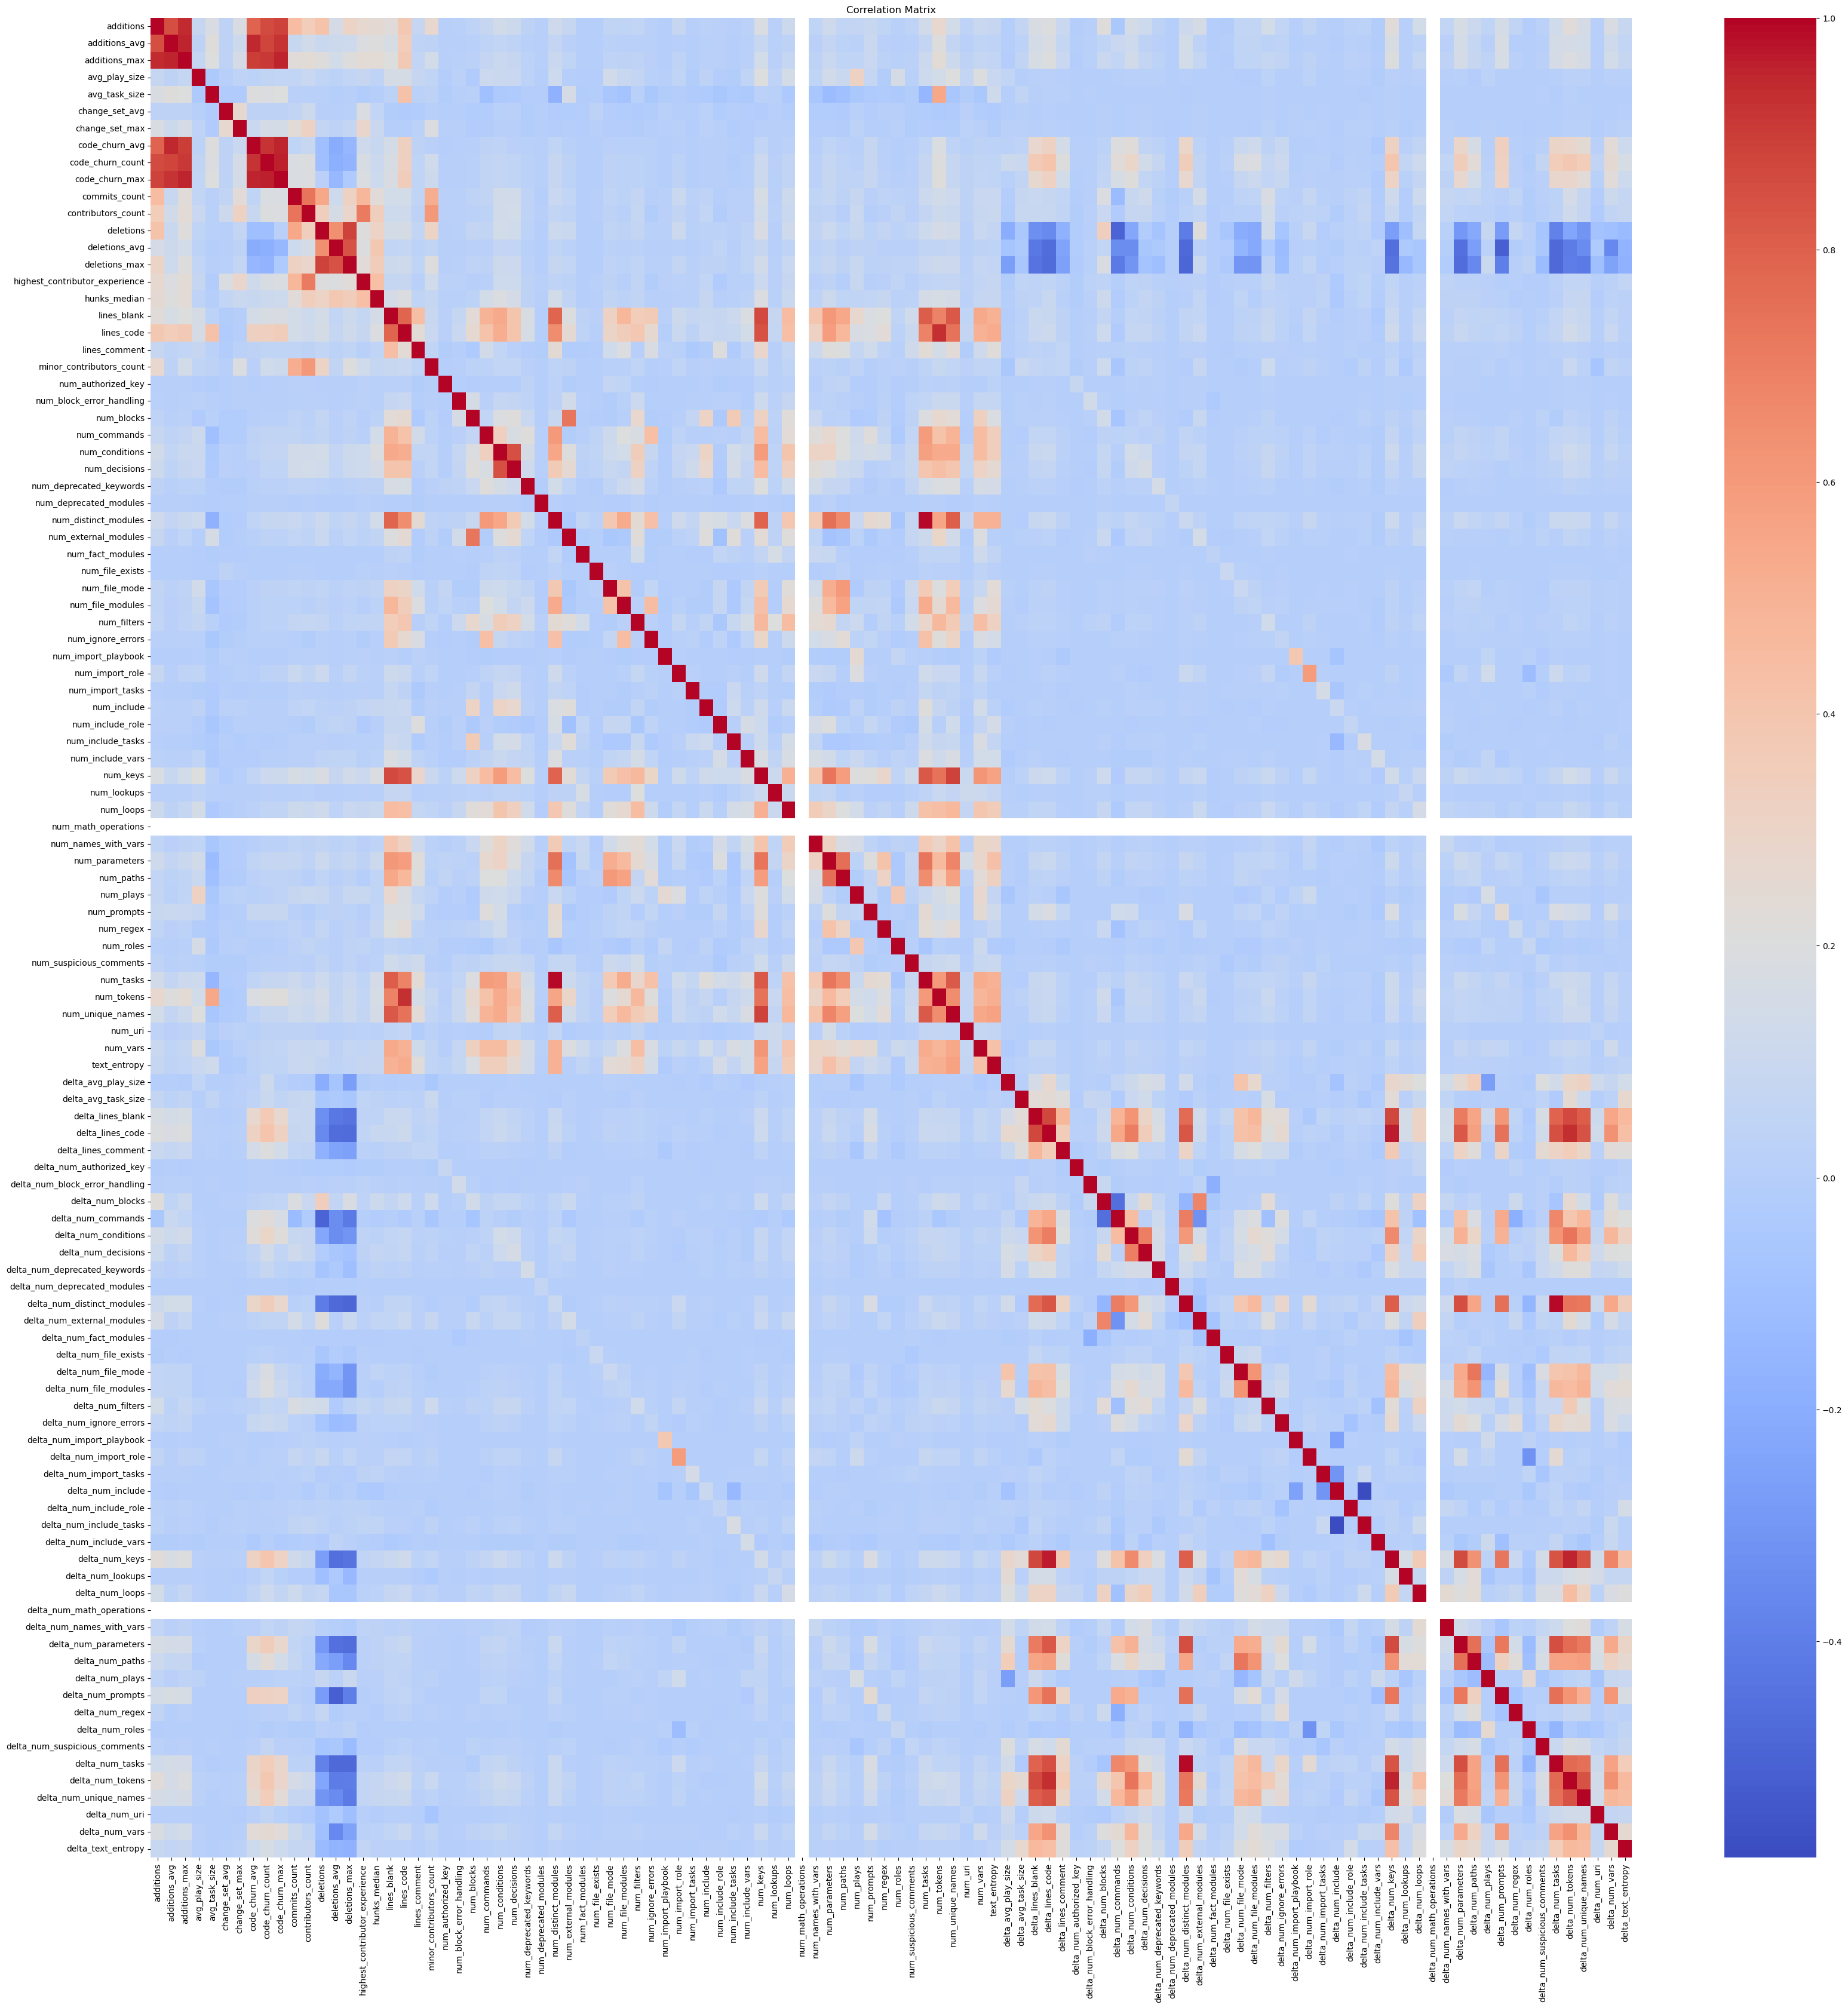

In [17]:
corr_matrix = X_train.corr()
plt.figure(figsize=(40,40))
sns.heatmap(corr_matrix, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [18]:
# Find highly correlated features
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)).abs()
high_correlation = upper[upper > 0.95].stack().reset_index()
high_correlation = high_correlation[high_correlation['level_0'] != high_correlation['level_1']]
high_correlation

,level_0,level_1,0
0,additions_avg,additions_max,0.956264
1,additions_max,code_churn_max,0.953432
2,code_churn_avg,code_churn_max,0.955708
3,code_churn_count,code_churn_max,0.959600
4,num_distinct_modules,num_tasks,0.988627
5,delta_lines_code,delta_num_keys,0.964396
6,delta_num_distinct_modules,delta_num_tasks,0.992436
7,delta_num_keys,delta_num_tokens,0.952337


In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

vif = calc_vif(X_train)
vif

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
0,additions,inf
1,additions_avg,3.595214e+04
2,additions_max,1.600374e+02
3,avg_play_size,1.309638e+00
4,avg_task_size,7.015963e+00
...,...,...
103,delta_num_tokens,2.957743e+01
104,delta_num_unique_names,5.866557e+00
105,delta_num_uri,1.165378e+00
106,delta_num_vars,2.671716e+00


In [20]:
vif.sort_values("VIF")

,variables,VIF
28,num_deprecated_modules,1.012563
74,delta_num_deprecated_modules,1.017382
21,num_authorized_key,1.020325
32,num_file_exists,1.022900
67,delta_num_authorized_key,1.031967
...,...,...
12,deletions,inf
8,code_churn_count,inf
0,additions,inf
47,num_math_operations,NaN


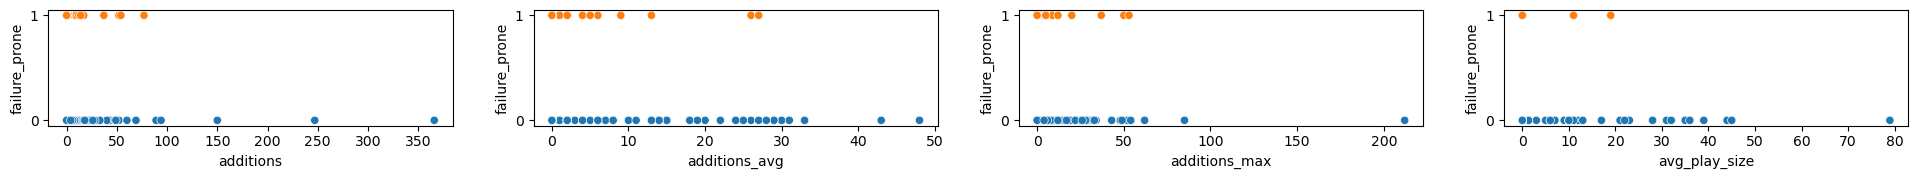

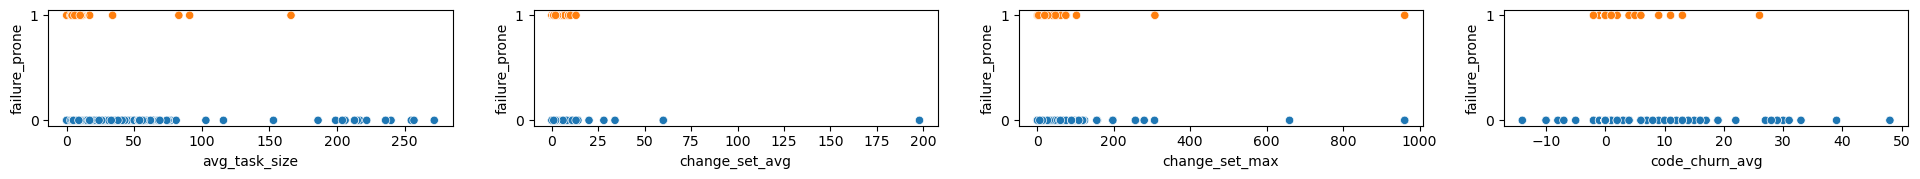

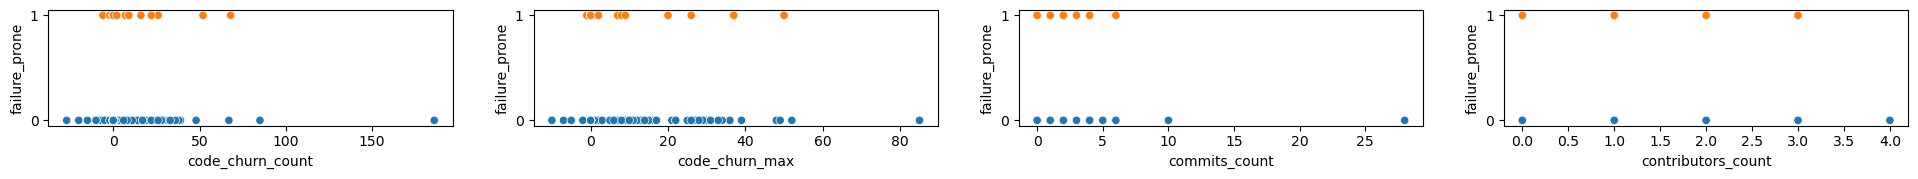

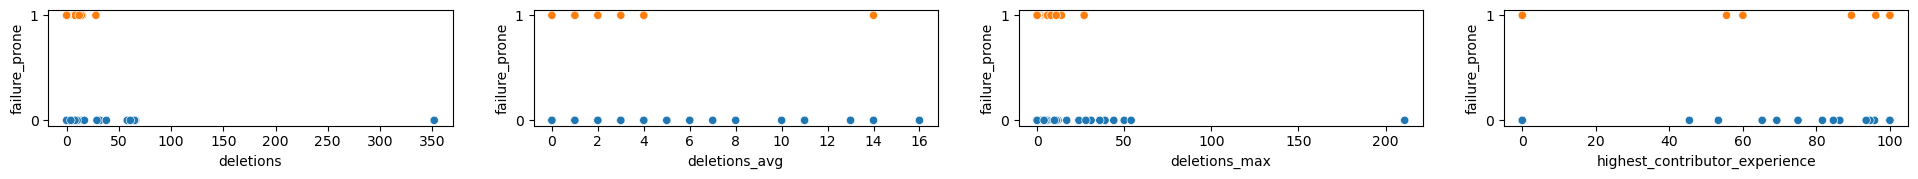

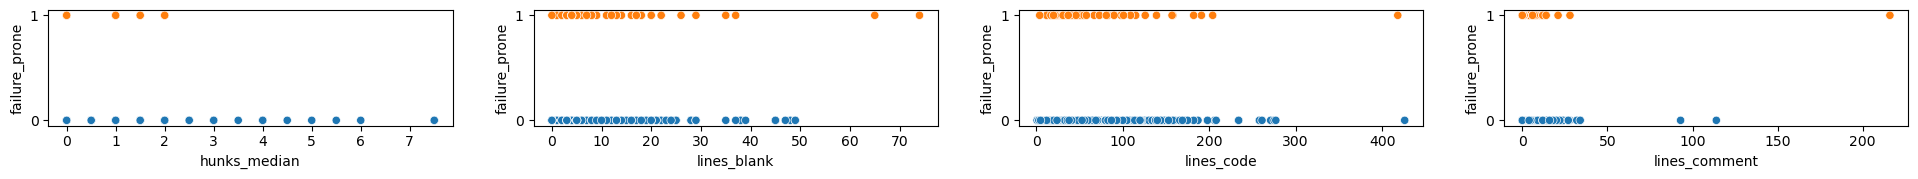

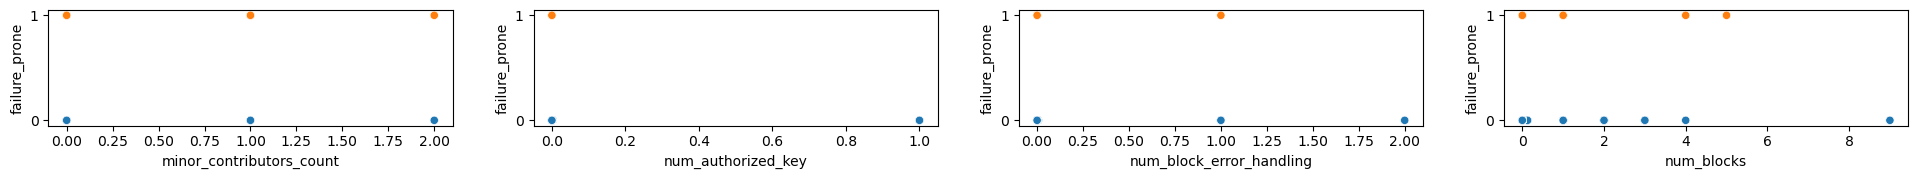

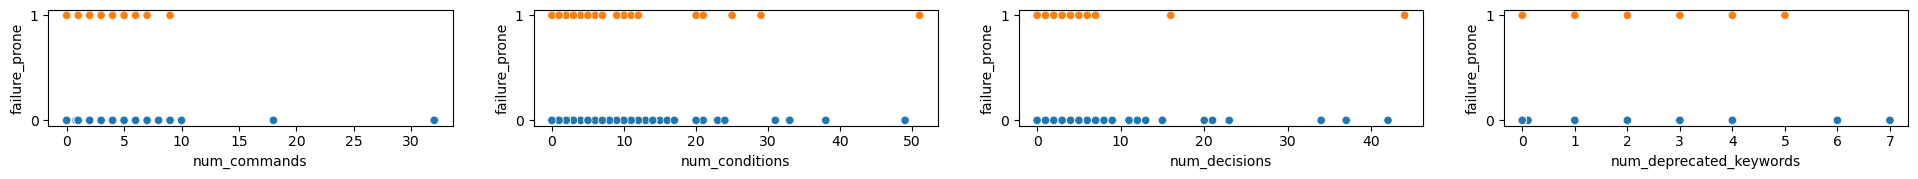

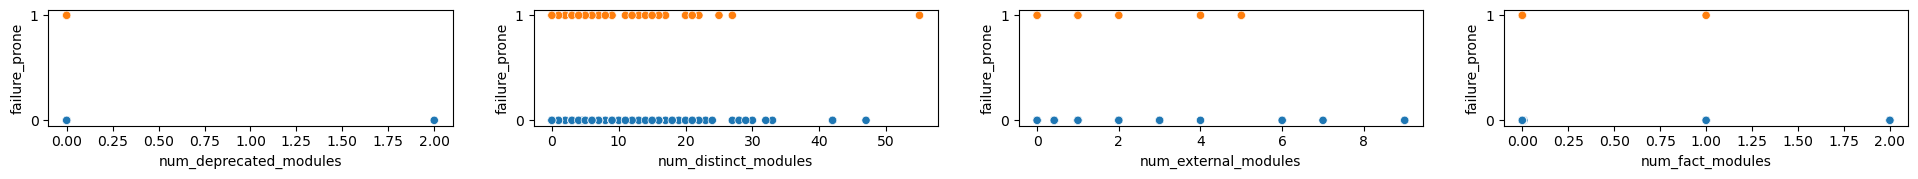

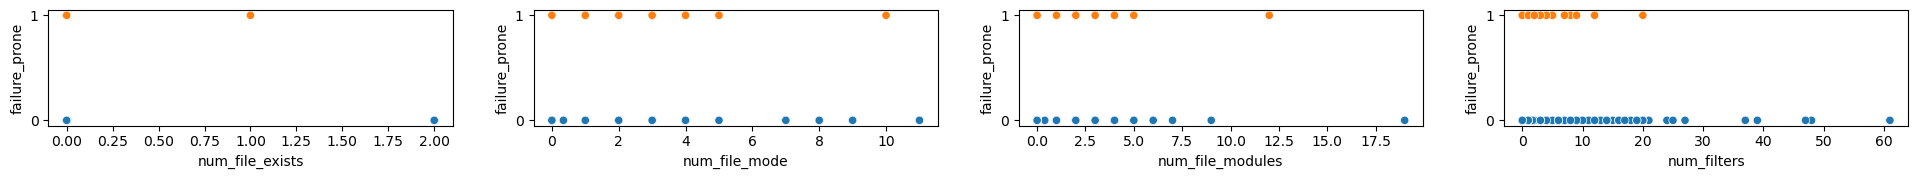

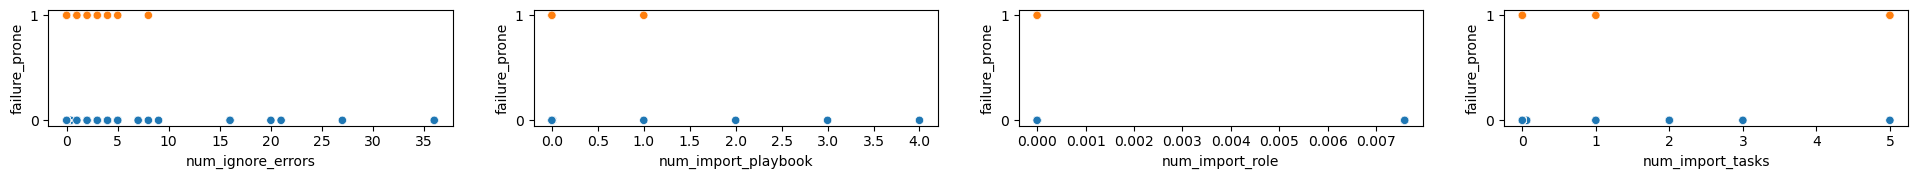

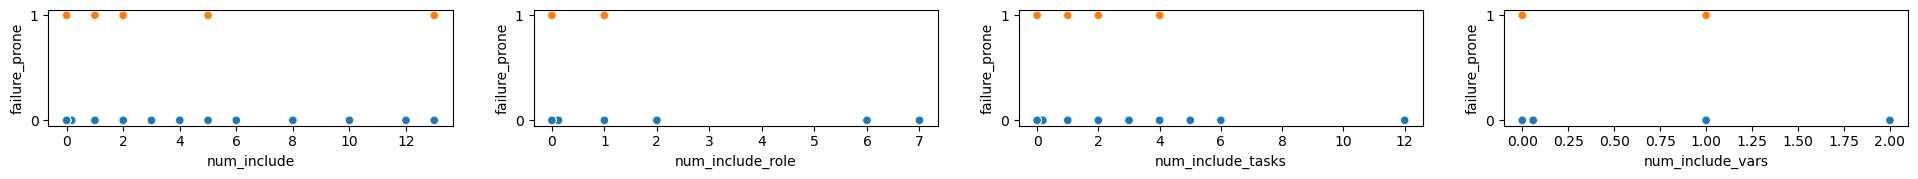

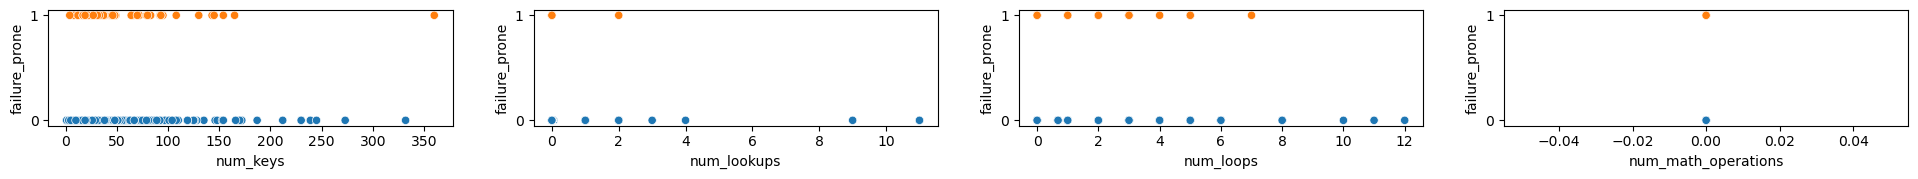

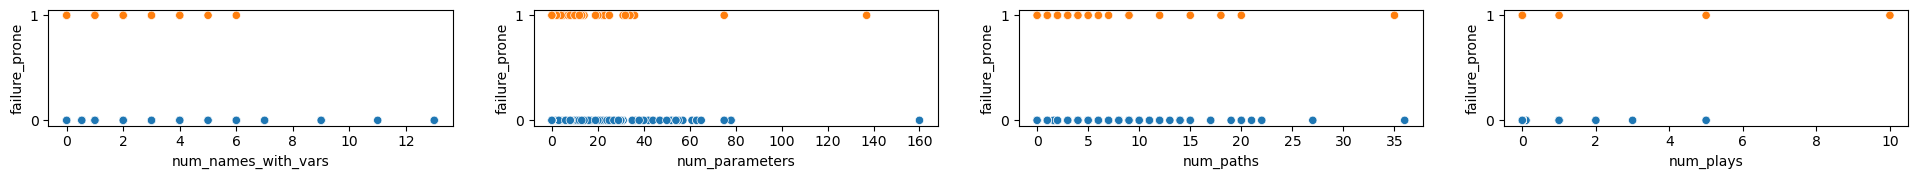

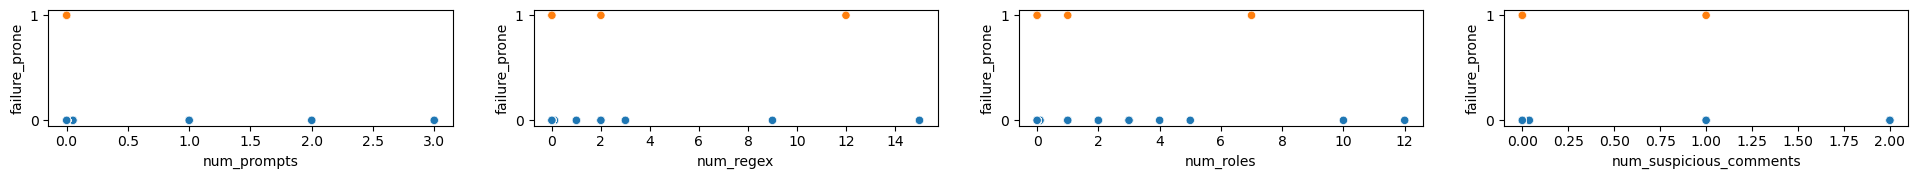

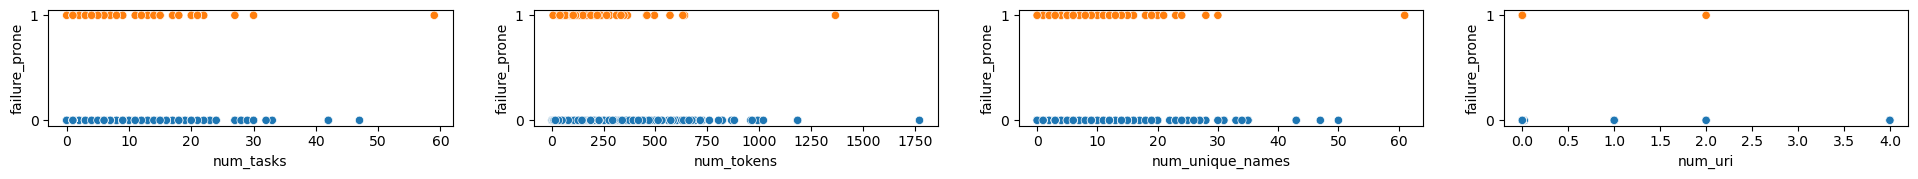

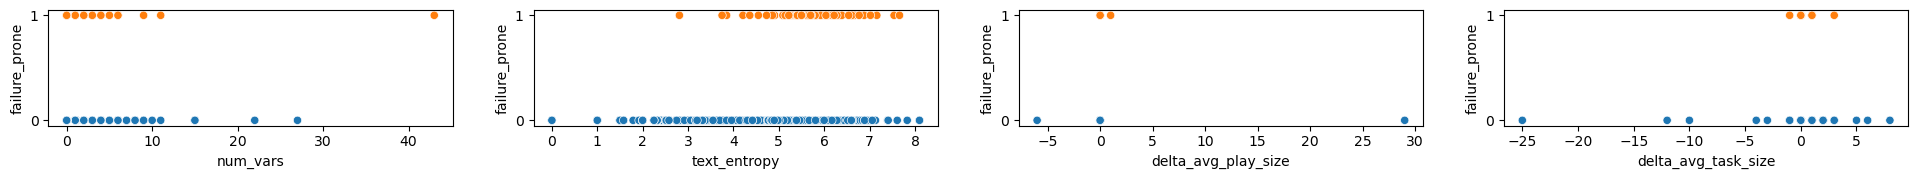

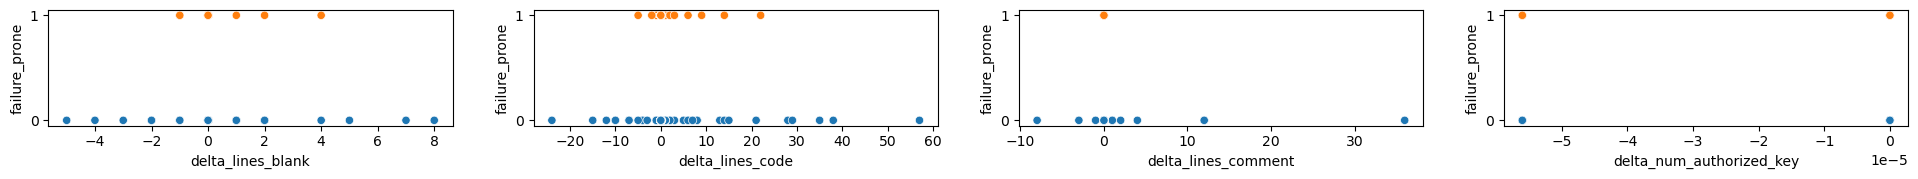

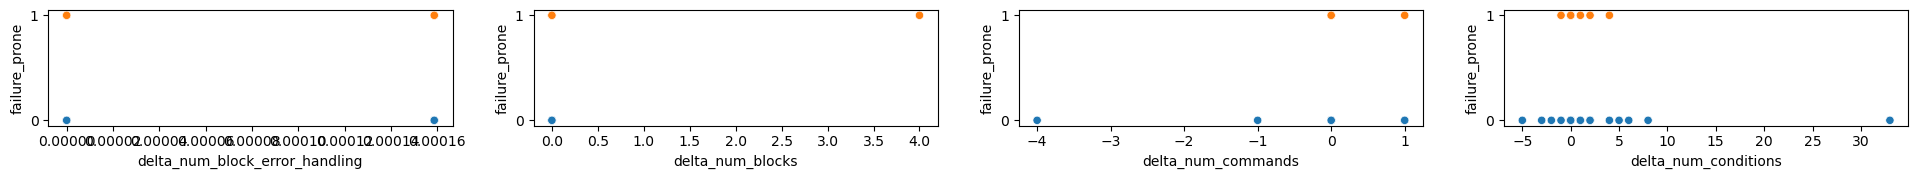

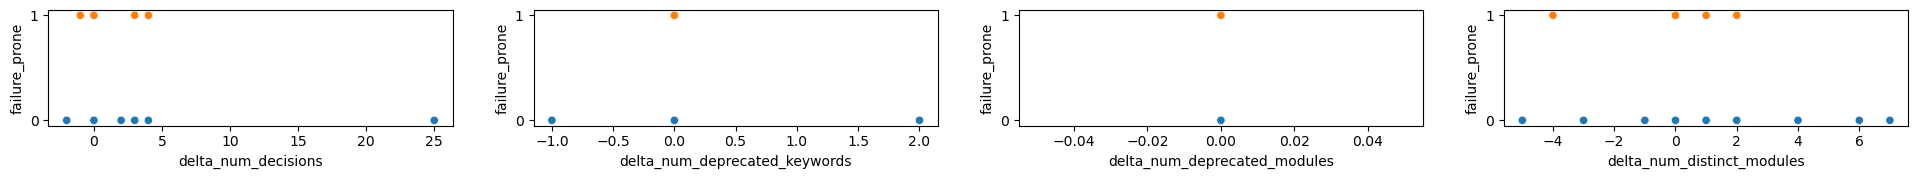

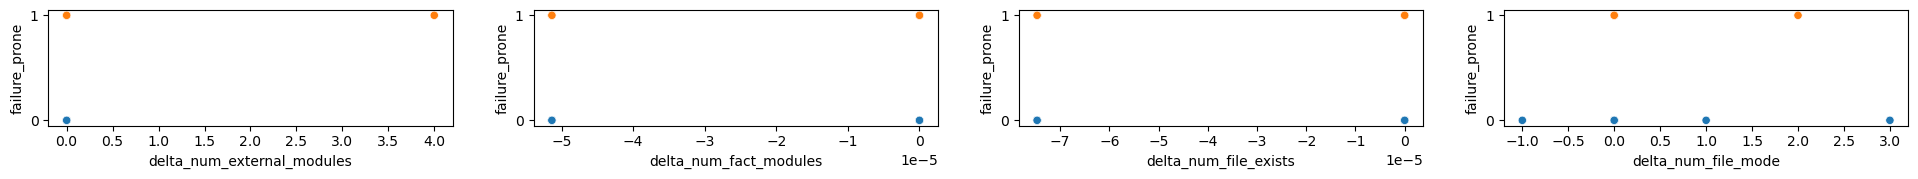

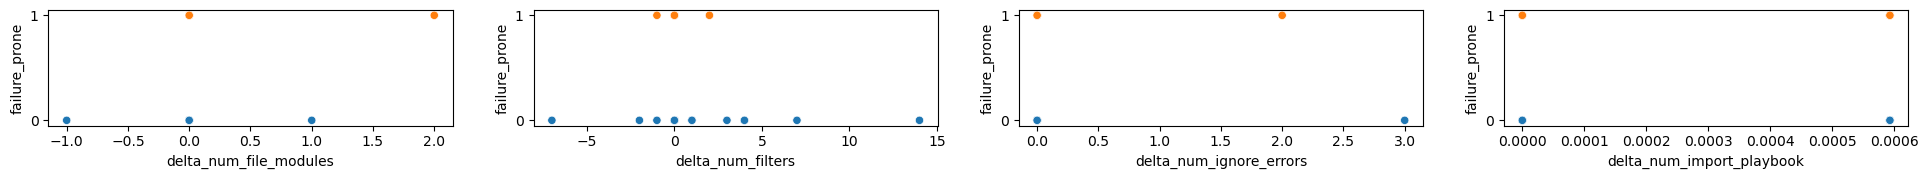

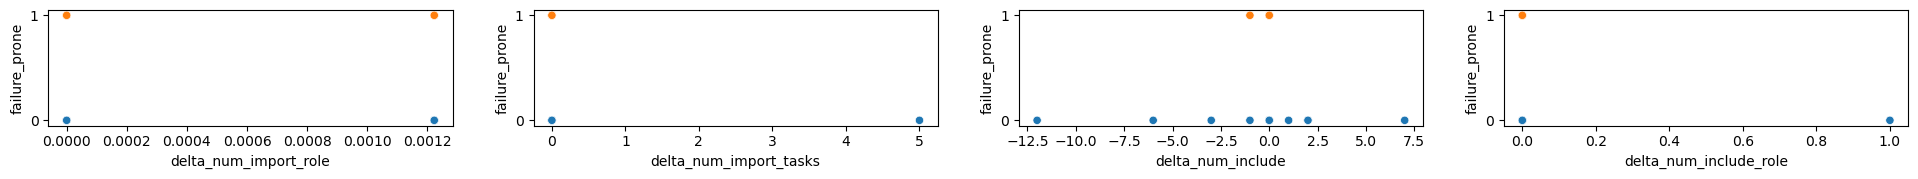

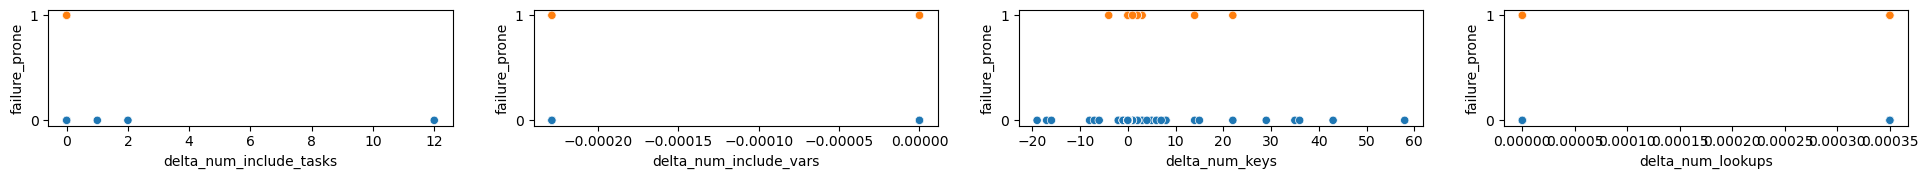

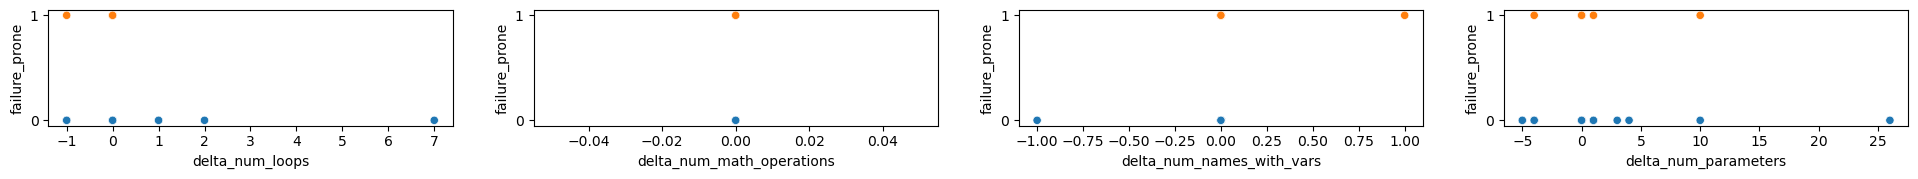

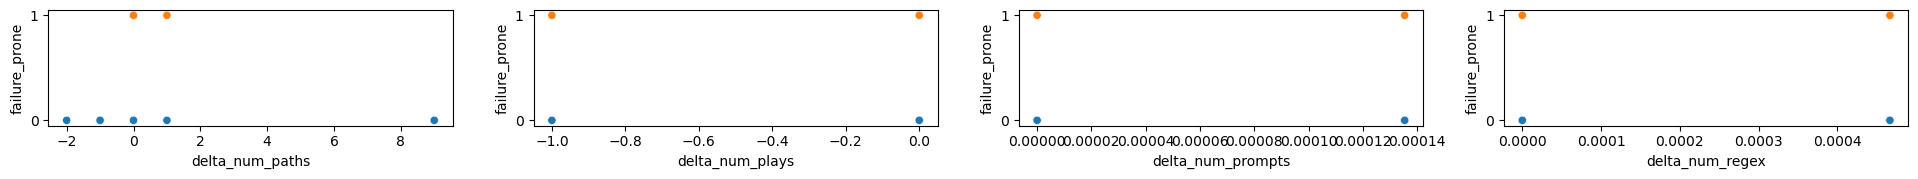

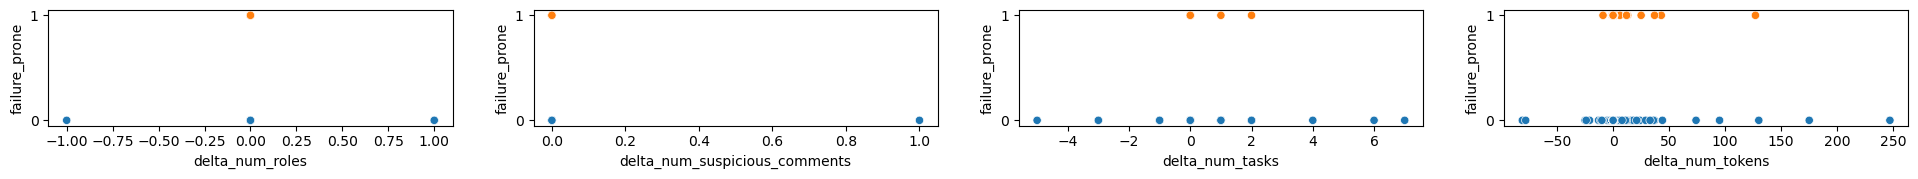

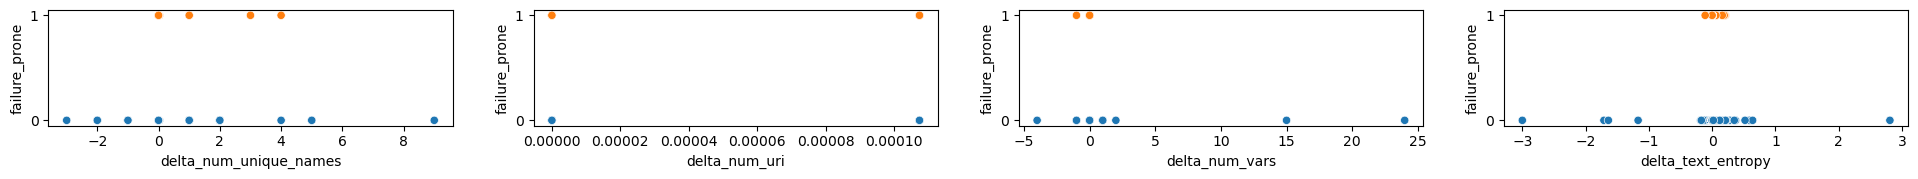

In [21]:
for j in range(27):
    fig, axs = plt.subplots(1,4, figsize=(24, 1.5))
    for i, ax in zip(range(4), axs.flat):
        ax.set_yticks([0, 1])
        sns.scatterplot(data=X_train.sample(n=1000, random_state=RANDOM_STATE), x=features[4*j+i], y=y_train.iloc[:, 1], 
                        hue=y_train.iloc[:, 1], ax=ax, legend=False)
    plt.show()

In [22]:
for col in features:
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers1 = ((X_train[col] < (Q1 - 1.5 * IQR)) | (X_train[col] > (Q3 + 1.5 * IQR))).sum()
    outliers2 = ((X_train[col] < (Q1 - 2 * IQR)) | (X_train[col] > (Q3 + 2 * IQR))).sum()
    print(f"{col}: for 1.5 IQR - {outliers1}, for 2 IQR - {outliers2}")

additions: for 1.5 IQR - 16377, for 2 IQR - 16377
additions_avg: for 1.5 IQR - 16190, for 2 IQR - 16190
additions_max: for 1.5 IQR - 16377, for 2 IQR - 16377
avg_play_size: for 1.5 IQR - 11709, for 2 IQR - 11709
avg_task_size: for 1.5 IQR - 18198, for 2 IQR - 16054
change_set_avg: for 1.5 IQR - 19386, for 2 IQR - 11693
change_set_max: for 1.5 IQR - 20613, for 2 IQR - 17528
code_churn_avg: for 1.5 IQR - 12902, for 2 IQR - 12902
code_churn_count: for 1.5 IQR - 13545, for 2 IQR - 13545
code_churn_max: for 1.5 IQR - 13345, for 2 IQR - 13345
commits_count: for 1.5 IQR - 17674, for 2 IQR - 17674
contributors_count: for 1.5 IQR - 17024, for 2 IQR - 17024
deletions: for 1.5 IQR - 11567, for 2 IQR - 11567
deletions_avg: for 1.5 IQR - 10735, for 2 IQR - 10735
deletions_max: for 1.5 IQR - 11567, for 2 IQR - 11567
highest_contributor_experience: for 1.5 IQR - 17024, for 2 IQR - 17024
hunks_median: for 1.5 IQR - 16991, for 2 IQR - 16991
lines_blank: for 1.5 IQR - 14972, for 2 IQR - 10768
lines_code

In [23]:
X_train.duplicated(keep=False).sum()

93440

In [24]:
# Check duplicates in each class
duplicates = X_train.duplicated(keep=False)
y_train.iloc[duplicates.values, 1].value_counts()

failure_prone
0    90472
1     2968
Name: count, dtype: int64